<a href="https://colab.research.google.com/github/olsem1/stepik_pandas_notebooks.github.io/blob/master/%22wp3_sfo_07_12_2020%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import numpy as np
import pandas as pd


import matplotlib as mpl
import matplotlib.pyplot as plt


from sklearn.metrics import mean_squared_error

In [92]:
#!rm -rf cpi_reg.xls

In [93]:
#from google.colab import files
#files.upload()

In [94]:
data = pd.read_excel('cpi_reg.xls', sheet_name = "year")
data = data.set_index('date')

In [95]:
data = data.interpolate(method='polynomial', order=2, axis=0)
data.isna().sum().sum()

0

In [96]:
data.min().min()

99.13

In [97]:
"""
# to log  and diff
data_new = pd.DataFrame(index = data.index[1:])
for region in data.columns:
  data_new[region] = np.diff(np.log(data[region].values))
#  data_new[region] = np.diff((data[region].values))
data=(data_new[:-10])
"""
data=(data[:-10])

In [98]:
data

,RF,BEL,BRY,VLA,VOR,IVA,KAL,KOS,KUR,LIP,MOS,ORL,RYA,SMO,TAM,TVE,TUL,YAR,MOW,KAR,KOM,ARK,VLG,KAG,LEN,MUR,NGR,PSK,SPB,ADY,KLM,KRA,AST,VGG,ROS,DAG,ING,KAB,KAO,NOR,STA,BAS,MAR,MOR,TAT,UDM,CHV,PER,KIR,NIZ,ORE,PNZ,SAM,SAR,ULY,KUG,SVE,TYU,CHE,ALI,TUV,KHK,ALT,KYA,IRK,KEM,NVS,OMS,TOM,BUR,ZAB,SAH,KAM,PRI,KHA,AMU,MAG,SAK,JEW,CHU
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002-01-01,115.34,114.64,116.48,116.67,112.11,117.52,117.60,116.19,117.73,114.61,117.63,115.09,114.24,114.79,113.83,115.93,116.62,115.09,118.59,115.60,116.02,115.12,112.47,118.54,117.02,117.66,115.33,115.56,116.51,117.56,118.39,121.31,116.17,115.05,121.89,118.56,135.85,120.17,117.83,114.93,117.18,114.21,113.90,115.58,117.21,116.17,116.80,117.41,113.60,116.50,114.16,113.76,116.69,115.00,114.58,114.62,114.18,116.61,116.36,108.40,109.96,111.16,110.78,116.81,112.44,112.97,111.19,111.12,115.15,110.94,113.99,113.81,112.70,111.83,119.06,114.68,114.49,109.60,113.39,111.16
2002-02-01,114.07,113.30,115.57,115.73,111.59,116.38,116.49,115.08,115.36,114.16,117.01,113.54,113.36,113.18,112.82,114.33,115.97,114.19,117.49,114.40,115.21,115.18,111.33,116.34,116.00,117.51,114.56,115.35,115.75,116.41,117.44,115.74,115.14,113.29,118.65,117.02,123.22,118.77,117.66,113.70,115.86,112.64,113.76,114.41,116.11,115.92,114.99,116.05,112.93,115.53,112.32,112.27,115.38,113.58,113.87,112.80,111.97,115.27,113.74,106.81,108.77,111.15,109.26,116.71,111.44,111.98,109.65,110.30,113.75,110.79,114.34,113.50,113.62,111.15,117.05,113.50,115.04,108.86,111.99,116.49
2002-03-01,112.89,112.60,114.56,114.54,110.77,114.39,114.82,113.71,113.85,113.69,115.15,112.68,112.44,112.18,111.91,113.07,113.71,113.17,115.50,112.27,114.13,113.16,111.45,116.58,114.81,115.41,112.54,114.49,114.99,114.51,116.53,114.16,113.11,112.26,116.35,115.63,122.65,118.06,117.44,112.58,114.38,111.14,112.17,113.75,114.55,113.76,112.44,114.99,111.82,114.23,110.51,111.13,113.07,111.87,112.29,112.46,110.12,115.29,112.89,106.78,108.66,111.06,109.23,115.93,110.65,110.79,108.50,109.10,112.30,110.02,114.10,113.65,113.67,110.27,115.06,112.14,110.26,108.11,111.68,113.62
2002-04-01,112.09,112.32,113.25,113.23,110.27,113.87,113.86,112.69,114.61,112.56,113.13,111.73,110.81,111.87,110.47,112.58,112.71,111.54,114.18,111.21,112.83,112.46,110.81,116.20,113.37,113.93,111.11,114.10,113.41,114.59,116.42,113.14,111.73,113.12,114.64,114.30,121.37,114.99,116.43,109.80,113.30,110.02,111.15,112.31,114.38,112.94,110.71,114.74,109.44,111.60,109.56,110.40,112.61,110.55,110.86,112.12,110.21,114.59,112.45,106.36,107.59,110.32,109.68,115.67,110.55,110.81,109.08,109.07,112.29,107.52,113.69,113.06,113.76,109.73,114.05,111.86,109.77,108.22,111.31,116.21
2002-05-01,112.16,111.45,113.23,113.57,110.60,112.34,112.98,111.79,114.28,111.43,112.35,111.09,110.62,111.21,110.06,112.02,112.22,112.73,114.08,110.57,113.05,112.84,111.22,117.14,113.36,113.28,110.68,113.32,112.62,113.33,116.93,113.66,110.65,112.85,115.02,112.18,122.13,116.45,114.84,109.96,113.12,110.32,111.13,113.98,115.66,111.22,110.15,114.32,109.36,111.74,110.44,110.50,112.37,111.14,112.03,112.67,111.45,114.52,112.37,107.29,108.05,111.42,111.27,115.73,110.45,111.23,109.69,109.96,113.52,107.83,112.57,111.96,112.72,109.54,113.76,111.45,111.12,108.67,112.33,117.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-01,104.31,104.06,105.09,105.28,104.53,105.15,104.06,104.81,105.47,104.95,104.62,104.03,104.50,104.03,105.64,102.82,103.83,105.37,104.60,104.08,105.02,103.85,103.14,105.01,103.86,104.57,104.51,104.38,104.05,103.61,105.32,104.52,104.25,103.32,104.48,103.47,103.50,104.51,103.30,102.90,104.11,104.50,104.95,103.45,104.03,103.00,103.80,104.05,103.27,103.98,104.05,103.72,103.94,104.34,104.91,104.74,104.26,102.73


Проверка на стационарность


In [99]:
"""from statsmodels.tsa.stattools import adfuller
%matplotlib inline
st = 0
notst = 0
p_value = 0.01
for num, region in enumerate(data.keys()):
  if region == 'RF':
    continue
  result = adfuller(data[region])
  result_text = []
  result_text.append('ADF: {:.5}, '.format(result[0]))
  result_text.append('p-val: {:.2}, '.format(result[1]))
  if result[1] < float(p_value):
      print('Регион:', region, 'p-val: {:.2}, '.format(result[1]))
      st += 1
  else:
      print('Нестационарный ряд в регионе:', region, 'p-val: {:.2}, '.format(result[1]))
      notst += 1
print('Нестационарных рядов всего:', notst, ' на уровне значимости , ', p_value)
"""

"from statsmodels.tsa.stattools import adfuller\n%matplotlib inline\nst = 0\nnotst = 0\np_value = 0.01\nfor num, region in enumerate(data.keys()):\n  if region == 'RF':\n    continue\n  result = adfuller(data[region])\n  result_text = []\n  result_text.append('ADF: {:.5}, '.format(result[0]))\n  result_text.append('p-val: {:.2}, '.format(result[1]))\n  if result[1] < float(p_value):\n      print('Регион:', region, 'p-val: {:.2}, '.format(result[1]))\n      st += 1\n  else:\n      print('Нестационарный ряд в регионе:', region, 'p-val: {:.2}, '.format(result[1]))\n      notst += 1\nprint('Нестационарных рядов всего:', notst, ' на уровне значимости , ', p_value)\n"

In [100]:
#reg_names = ['ALI','TUV','KHK','ALT','KYA','IRK','KEM','NVS','OMS','TOM']
reg_names = data.columns
reg_names

Index(['RF', 'BEL', 'BRY', 'VLA', 'VOR', 'IVA', 'KAL', 'KOS', 'KUR', 'LIP',
       'MOS', 'ORL', 'RYA', 'SMO', 'TAM', 'TVE', 'TUL', 'YAR', 'MOW', 'KAR',
       'KOM', 'ARK', 'VLG', 'KAG', 'LEN', 'MUR', 'NGR', 'PSK', 'SPB', 'ADY',
       'KLM', 'KRA', 'AST', 'VGG', 'ROS', 'DAG', 'ING', 'KAB', 'KAO', 'NOR',
       'STA', 'BAS', 'MAR', 'MOR', 'TAT', 'UDM', 'CHV', 'PER', 'KIR', 'NIZ',
       'ORE', 'PNZ', 'SAM', 'SAR', 'ULY', 'KUG', 'SVE', 'TYU', 'CHE', 'ALI',
       'TUV', 'KHK', 'ALT', 'KYA', 'IRK', 'KEM', 'NVS', 'OMS', 'TOM', 'BUR',
       'ZAB', 'SAH', 'KAM', 'PRI', 'KHA', 'AMU', 'MAG', 'SAK', 'JEW', 'CHU'],
      dtype='object')

In [101]:
data = data[reg_names]
data

,RF,BEL,BRY,VLA,VOR,IVA,KAL,KOS,KUR,LIP,MOS,ORL,RYA,SMO,TAM,TVE,TUL,YAR,MOW,KAR,KOM,ARK,VLG,KAG,LEN,MUR,NGR,PSK,SPB,ADY,KLM,KRA,AST,VGG,ROS,DAG,ING,KAB,KAO,NOR,STA,BAS,MAR,MOR,TAT,UDM,CHV,PER,KIR,NIZ,ORE,PNZ,SAM,SAR,ULY,KUG,SVE,TYU,CHE,ALI,TUV,KHK,ALT,KYA,IRK,KEM,NVS,OMS,TOM,BUR,ZAB,SAH,KAM,PRI,KHA,AMU,MAG,SAK,JEW,CHU
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002-01-01,115.34,114.64,116.48,116.67,112.11,117.52,117.60,116.19,117.73,114.61,117.63,115.09,114.24,114.79,113.83,115.93,116.62,115.09,118.59,115.60,116.02,115.12,112.47,118.54,117.02,117.66,115.33,115.56,116.51,117.56,118.39,121.31,116.17,115.05,121.89,118.56,135.85,120.17,117.83,114.93,117.18,114.21,113.90,115.58,117.21,116.17,116.80,117.41,113.60,116.50,114.16,113.76,116.69,115.00,114.58,114.62,114.18,116.61,116.36,108.40,109.96,111.16,110.78,116.81,112.44,112.97,111.19,111.12,115.15,110.94,113.99,113.81,112.70,111.83,119.06,114.68,114.49,109.60,113.39,111.16
2002-02-01,114.07,113.30,115.57,115.73,111.59,116.38,116.49,115.08,115.36,114.16,117.01,113.54,113.36,113.18,112.82,114.33,115.97,114.19,117.49,114.40,115.21,115.18,111.33,116.34,116.00,117.51,114.56,115.35,115.75,116.41,117.44,115.74,115.14,113.29,118.65,117.02,123.22,118.77,117.66,113.70,115.86,112.64,113.76,114.41,116.11,115.92,114.99,116.05,112.93,115.53,112.32,112.27,115.38,113.58,113.87,112.80,111.97,115.27,113.74,106.81,108.77,111.15,109.26,116.71,111.44,111.98,109.65,110.30,113.75,110.79,114.34,113.50,113.62,111.15,117.05,113.50,115.04,108.86,111.99,116.49
2002-03-01,112.89,112.60,114.56,114.54,110.77,114.39,114.82,113.71,113.85,113.69,115.15,112.68,112.44,112.18,111.91,113.07,113.71,113.17,115.50,112.27,114.13,113.16,111.45,116.58,114.81,115.41,112.54,114.49,114.99,114.51,116.53,114.16,113.11,112.26,116.35,115.63,122.65,118.06,117.44,112.58,114.38,111.14,112.17,113.75,114.55,113.76,112.44,114.99,111.82,114.23,110.51,111.13,113.07,111.87,112.29,112.46,110.12,115.29,112.89,106.78,108.66,111.06,109.23,115.93,110.65,110.79,108.50,109.10,112.30,110.02,114.10,113.65,113.67,110.27,115.06,112.14,110.26,108.11,111.68,113.62
2002-04-01,112.09,112.32,113.25,113.23,110.27,113.87,113.86,112.69,114.61,112.56,113.13,111.73,110.81,111.87,110.47,112.58,112.71,111.54,114.18,111.21,112.83,112.46,110.81,116.20,113.37,113.93,111.11,114.10,113.41,114.59,116.42,113.14,111.73,113.12,114.64,114.30,121.37,114.99,116.43,109.80,113.30,110.02,111.15,112.31,114.38,112.94,110.71,114.74,109.44,111.60,109.56,110.40,112.61,110.55,110.86,112.12,110.21,114.59,112.45,106.36,107.59,110.32,109.68,115.67,110.55,110.81,109.08,109.07,112.29,107.52,113.69,113.06,113.76,109.73,114.05,111.86,109.77,108.22,111.31,116.21
2002-05-01,112.16,111.45,113.23,113.57,110.60,112.34,112.98,111.79,114.28,111.43,112.35,111.09,110.62,111.21,110.06,112.02,112.22,112.73,114.08,110.57,113.05,112.84,111.22,117.14,113.36,113.28,110.68,113.32,112.62,113.33,116.93,113.66,110.65,112.85,115.02,112.18,122.13,116.45,114.84,109.96,113.12,110.32,111.13,113.98,115.66,111.22,110.15,114.32,109.36,111.74,110.44,110.50,112.37,111.14,112.03,112.67,111.45,114.52,112.37,107.29,108.05,111.42,111.27,115.73,110.45,111.23,109.69,109.96,113.52,107.83,112.57,111.96,112.72,109.54,113.76,111.45,111.12,108.67,112.33,117.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-01,104.31,104.06,105.09,105.28,104.53,105.15,104.06,104.81,105.47,104.95,104.62,104.03,104.50,104.03,105.64,102.82,103.83,105.37,104.60,104.08,105.02,103.85,103.14,105.01,103.86,104.57,104.51,104.38,104.05,103.61,105.32,104.52,104.25,103.32,104.48,103.47,103.50,104.51,103.30,102.90,104.11,104.50,104.95,103.45,104.03,103.00,103.80,104.05,103.27,103.98,104.05,103.72,103.94,104.34,104.91,104.74,104.26,102.73

Скользящее окно, подставляем прогнозы для прогноза на точку вперед

In [102]:
test_len = 3

Если хотим на полгода, то тестлен меняем на 6

In [103]:
train_data = data[:-test_len]
test_data = data[-test_len:]

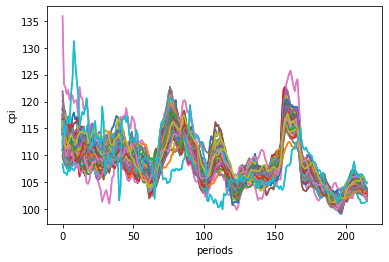

In [104]:
plt.plot(data.values);
plt.plot(train_data.values);
plt.xlabel('periods')
plt.ylabel('cpi')
plt.show()

# auto ARIMA

In [105]:
!pip install pmdarima -q

In [106]:
from pmdarima.arima import auto_arima

## Training once, forecast for test_len period


In [107]:
def get_metric(y_true, predict, horizon):
  rmse_reg = []
  nrmse_reg = []
  print('h\trmse\tnrmse')
  for h in [1,3,6,12]:
    rmse_reg.append(mean_squared_error(y_true[:h], predict[:h]) ** 0.5)
    nrmse_reg.append(mean_squared_error(y_true[:h], predict[:h]) ** 0.5 / np.mean(y_true[:h]) * 100)

    print('{}\t{:.4f}\t{:.4f}'.format(h, rmse_reg[-1], nrmse_reg[-1]))

  return rmse_reg, nrmse_reg


def plot_series(test, predict):
  plt.plot(test, label='test')
  plt.plot(predict, label='pred')
  plt.ylabel('cpi')
  plt.xlabel('periods')
  plt.legend()
  plt.show()

In [108]:
rmse_list = []
nrmse_list = []

reg_name:  RF
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.42 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=2.205, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=1.283, Time=0.40 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.79 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=1.111, Time=0.12 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.40 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.84 sec
 ARIMA(2,1,0)(0,1,0)[12]             : OOB=1.157, Time=0.17 sec
 ARIMA(1,1,1)(0,1,0)[12]             : OOB=1.124, Time=0.20 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=1.521, Time=0.19 sec
 ARIMA(2,1,1)(0,1,0)[12]             : OOB=1.135, Time=0.28 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : OOB=1.226, Time=0.29 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 8.192 seconds


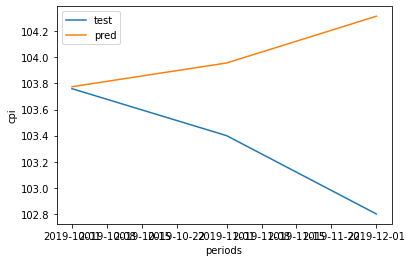

h	rmse	nrmse
1	0.0149	0.0144
3	0.9320	0.9021
6	0.9320	0.9021
12	0.9320	0.9021
reg_name:  BEL
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.84 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=1.118, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.402, Time=0.26 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.39 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.490, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.157, Time=0.79 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=3.03 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=2.17 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.058, Time=0.51 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.025, Time=0.19 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.32 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=inf, Time=0.81 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf, Time=3.05 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.1

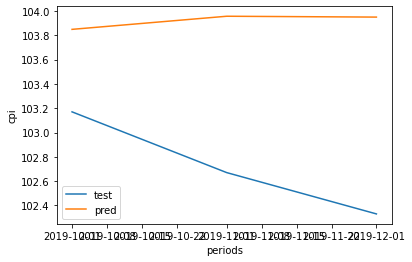

h	rmse	nrmse
1	0.6790	0.6581
3	1.2571	1.2238
6	1.2571	1.2238
12	1.2571	1.2238
reg_name:  BRY
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.17 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=1.499, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=4.084, Time=0.32 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.25 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=1.401, Time=0.18 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=1.659, Time=0.46 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.76 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=inf, Time=1.05 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf, Time=3.71 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=2.300, Time=0.29 sec
 ARIMA(1,1,1)(1,1,0)[12]             : OOB=3.864, Time=0.44 sec
 ARIMA(0,1,0)(1,1,0)[12] intercept   : OOB=1.265, Time=0.50 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : OOB=1.712, Time=0.11 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : OOB

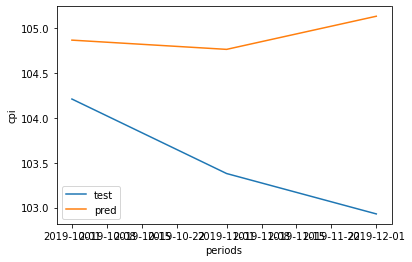

h	rmse	nrmse
1	0.6563	0.6298
3	1.5487	1.4962
6	1.5487	1.4962
12	1.5487	1.4962
reg_name:  VLA
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.20 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=4.279, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.440, Time=0.26 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.51 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=2.527, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.706, Time=0.69 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.60 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.21 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=3.46 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.456, Time=0.18 sec
 ARIMA(2,1,0)(1,1,0)[12]             : OOB=0.437, Time=0.38 sec
 ARIMA(2,1,0)(0,1,0)[12]             : OOB=2.569, Time=0.13 sec
 ARIMA(2,1,0)(2,1,0)[12]             : OOB=0.696, Time=0.95 sec
 ARIMA(2,1,0)(1,1,1)[12]             : OOB

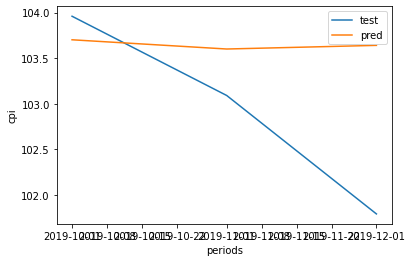

h	rmse	nrmse
1	0.2584	0.2486
3	1.1181	1.0861
6	1.1181	1.0861
12	1.1181	1.0861
reg_name:  VOR
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.65 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=2.806, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.495, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.70 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=1.545, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=1.406, Time=0.74 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.96 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.18 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=4.57 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.039, Time=0.19 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.014, Time=0.51 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf, Time=2.69 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.25 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.7

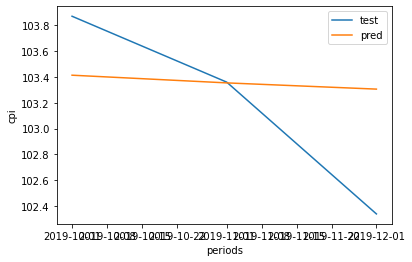

h	rmse	nrmse
1	0.4563	0.4393
3	0.6168	0.5978
6	0.6168	0.5978
12	0.6168	0.5978
reg_name:  IVA
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.12 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=4.466, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.975, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.78 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=4.129, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=2.105, Time=0.68 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.41 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.23 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=5.10 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.246, Time=0.18 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.063, Time=0.43 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf, Time=3.85 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.03 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.9

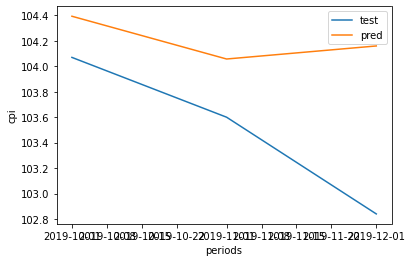

h	rmse	nrmse
1	0.3234	0.3108
3	0.8279	0.7998
6	0.8279	0.7998
12	0.8279	0.7998
reg_name:  KAL
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.61 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=1.648, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.261, Time=0.31 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.37 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.837, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=1.367, Time=0.69 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.50 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.08 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=5.01 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.037, Time=0.19 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.152, Time=0.48 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.28 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=inf, Time=0.73 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf

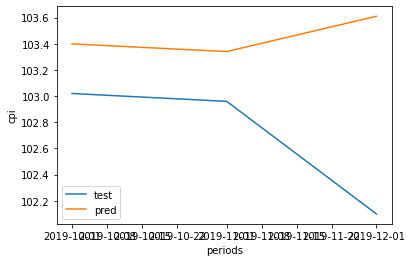

h	rmse	nrmse
1	0.3790	0.3679
3	0.9255	0.9012
6	0.9255	0.9012
12	0.9255	0.9012
reg_name:  KOS
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.63 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=2.465, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.087, Time=0.30 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.20 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=1.952, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.402, Time=1.70 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.53 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.17 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=3.67 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.106, Time=0.18 sec
 ARIMA(2,1,0)(1,1,0)[12]             : OOB=0.121, Time=0.40 sec
 ARIMA(1,1,1)(1,1,0)[12]             : OOB=0.111, Time=0.42 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.088, Time=0.31 sec
 ARIMA(2,1,1)(1,1,0)[12]             : OOB

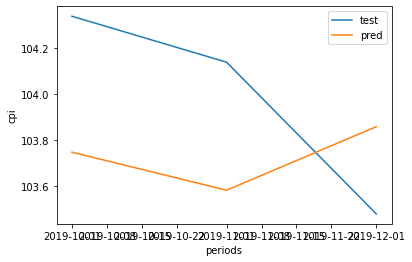

h	rmse	nrmse
1	0.5914	0.5668
3	0.5176	0.4978
6	0.5176	0.4978
12	0.5176	0.4978
reg_name:  KUR
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.55 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=3.633, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=2.177, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.53 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=2.050, Time=0.09 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.18 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=2.14 sec
 ARIMA(2,1,0)(0,1,0)[12]             : OOB=2.044, Time=0.11 sec
 ARIMA(2,1,0)(1,1,0)[12]             : OOB=1.903, Time=0.38 sec
 ARIMA(2,1,0)(2,1,0)[12]             : OOB=1.473, Time=0.95 sec
 ARIMA(2,1,0)(2,1,1)[12]             : OOB=inf, Time=4.00 sec
 ARIMA(2,1,0)(1,1,1)[12]             : OOB=inf, Time=2.43 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=1.617, Time=0.67 sec
 ARIMA(2,1,1)(2,1,0)[12]             : OOB=1

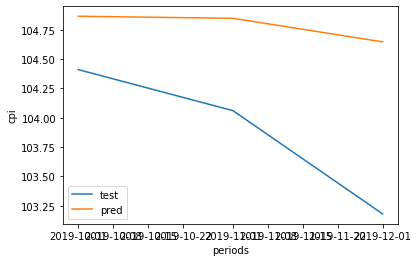

h	rmse	nrmse
1	0.4547	0.4355
3	0.9961	0.9588
6	0.9961	0.9588
12	0.9961	0.9588
reg_name:  LIP
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.60 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=5.179, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=2.759, Time=0.30 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.36 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=2.773, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=4.770, Time=0.71 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.68 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.24 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=3.65 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.210, Time=0.20 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.010, Time=0.48 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf, Time=2.99 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.10 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=1.0

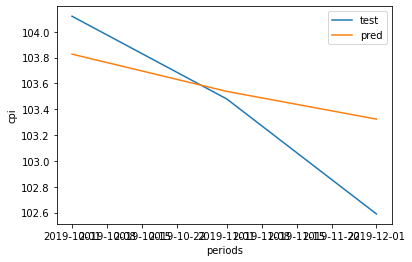

h	rmse	nrmse
1	0.2933	0.2816
3	0.4574	0.4424
6	0.4574	0.4424
12	0.4574	0.4424
reg_name:  MOS
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.47 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=1.370, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.671, Time=0.32 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.29 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=2.714, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=1.765, Time=0.69 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.46 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.35 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=3.59 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.215, Time=0.18 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.437, Time=0.53 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.26 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=inf, Time=0.93 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf

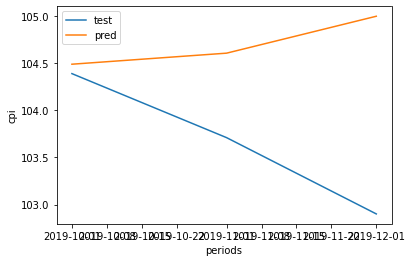

h	rmse	nrmse
1	0.0999	0.0957
3	1.3194	1.2727
6	1.3194	1.2727
12	1.3194	1.2727
reg_name:  ORL
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.72 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=1.324, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=1.496, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.84 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.087, Time=0.17 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.073, Time=0.47 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf, Time=2.75 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=1.355, Time=0.68 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.552, Time=0.73 sec
 ARIMA(1,1,1)(2,1,0)[12]             : OOB=1.354, Time=0.94 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : OOB=0.059, Time=1.23 sec
 ARIMA(0,1,0)(1,1,0)[12] intercept   : OOB=0.064, Time=0.48 sec
 ARIMA(0,1,0)(2,1,1)[12] intercept   : O

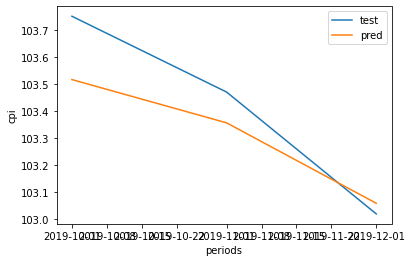

h	rmse	nrmse
1	0.2339	0.2255
3	0.1518	0.1468
6	0.1518	0.1468
12	0.1518	0.1468
reg_name:  RYA
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.79 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=5.049, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=5.586, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=2.20 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.809, Time=0.19 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.684, Time=0.44 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf, Time=2.79 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=6.186, Time=0.68 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=2.809, Time=0.71 sec
 ARIMA(1,1,1)(2,1,0)[12]             : OOB=5.595, Time=0.93 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : OOB=0.644, Time=1.21 sec
 ARIMA(0,1,0)(1,1,0)[12] intercept   : OOB=0.756, Time=0.46 sec
 ARIMA(0,1,0)(2,1,1)[12] intercept   : O

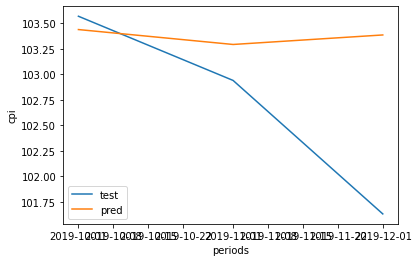

h	rmse	nrmse
1	0.1306	0.1261
3	1.0371	1.0097
6	1.0371	1.0097
12	1.0371	1.0097
reg_name:  SMO
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.72 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=6.651, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.525, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.28 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=3.334, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=1.909, Time=0.67 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.69 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=0.97 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=3.67 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.268, Time=0.18 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.009, Time=0.46 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf, Time=3.03 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.47 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.6

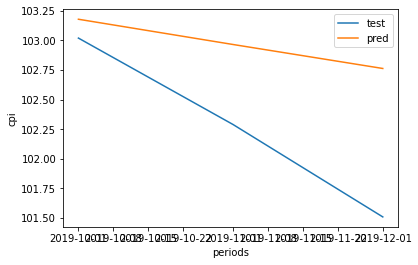

h	rmse	nrmse
1	0.1591	0.1544
3	0.8272	0.8089
6	0.8272	0.8089
12	0.8272	0.8089
reg_name:  TAM
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.18 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=2.084, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.143, Time=0.30 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.71 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=1.875, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.073, Time=0.63 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=4.95 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.51 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.087, Time=0.48 sec
 ARIMA(2,1,0)(2,1,0)[12]             : OOB=0.071, Time=0.92 sec
 ARIMA(2,1,0)(1,1,0)[12]             : OOB=0.141, Time=0.43 sec
 ARIMA(2,1,0)(2,1,1)[12]             : OOB=inf, Time=5.31 sec
 ARIMA(2,1,0)(1,1,1)[12]             : OOB=inf, Time=2.70 sec
 ARIMA(2,1,1)(2,1,0)[12]             : OOB=0

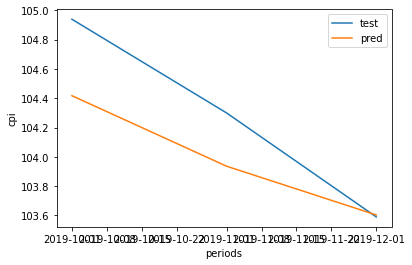

h	rmse	nrmse
1	0.5222	0.4976
3	0.3675	0.3524
6	0.3675	0.3524
12	0.3675	0.3524
reg_name:  TVE
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.80 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=10.873, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=1.948, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.78 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=9.658, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=5.359, Time=0.63 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.59 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.19 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=5.48 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.216, Time=0.17 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.271, Time=0.44 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.02 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=inf, Time=0.83 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=in

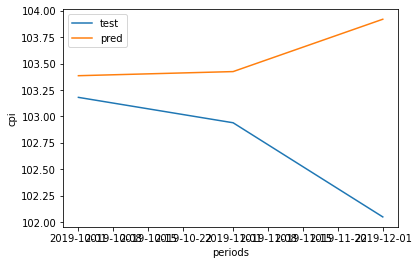

h	rmse	nrmse
1	0.2048	0.1985
3	1.1206	1.0909
6	1.1206	1.0909
12	1.1206	1.0909
reg_name:  TUL
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.83 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=4.757, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.211, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.85 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=2.151, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.084, Time=0.65 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=3.73 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.49 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.841, Time=0.44 sec
 ARIMA(2,1,0)(2,1,0)[12]             : OOB=0.070, Time=0.93 sec
 ARIMA(2,1,0)(1,1,0)[12]             : OOB=0.187, Time=0.40 sec
 ARIMA(2,1,0)(2,1,1)[12]             : OOB=inf, Time=5.43 sec
 ARIMA(2,1,0)(1,1,1)[12]             : OOB=inf, Time=2.96 sec
 ARIMA(2,1,1)(2,1,0)[12]             : OOB=0

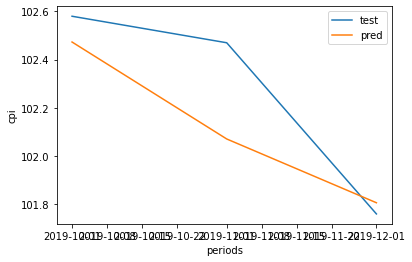

h	rmse	nrmse
1	0.1069	0.1042
3	0.2400	0.2347
6	0.2400	0.2347
12	0.2400	0.2347
reg_name:  YAR
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.72 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=5.939, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.244, Time=0.30 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.43 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=5.913, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.273, Time=0.66 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.65 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.19 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=4.70 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.737, Time=0.19 sec
 ARIMA(2,1,0)(1,1,0)[12]             : OOB=0.197, Time=0.44 sec
 ARIMA(2,1,0)(0,1,0)[12]             : OOB=5.625, Time=0.12 sec
 ARIMA(2,1,0)(2,1,0)[12]             : OOB=0.275, Time=0.98 sec
 ARIMA(2,1,0)(1,1,1)[12]             : OOB

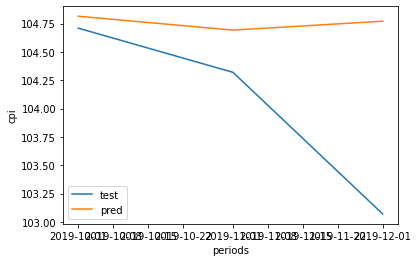

h	rmse	nrmse
1	0.1053	0.1006
3	1.0076	0.9685
6	1.0076	0.9685
12	1.0076	0.9685
reg_name:  MOW
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.97 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=1.664, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=2.611, Time=0.38 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.28 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.453, Time=0.21 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.608, Time=0.50 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.22 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=inf, Time=0.84 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf, Time=2.99 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=2.065, Time=0.31 sec
 ARIMA(1,1,1)(1,1,0)[12]             : OOB=2.648, Time=0.45 sec
 ARIMA(0,1,0)(1,1,0)[12] intercept   : OOB=0.306, Time=0.50 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : OOB=1.957, Time=0.10 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : OOB

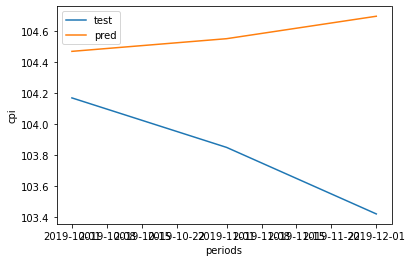

h	rmse	nrmse
1	0.3009	0.2888
3	0.8597	0.8281
6	0.8597	0.8281
12	0.8597	0.8281
reg_name:  KAR
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.77 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=1.849, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.249, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.44 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=1.223, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.827, Time=0.65 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=2.32 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.16 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=3.64 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.036, Time=0.18 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.022, Time=0.45 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf, Time=2.97 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.19 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.1

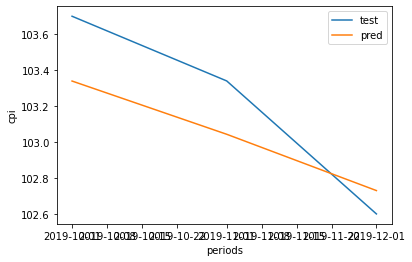

h	rmse	nrmse
1	0.3606	0.3477
3	0.2799	0.2712
6	0.2799	0.2712
12	0.2799	0.2712
reg_name:  KOM
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.61 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=2.585, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.053, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.52 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=2.360, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.012, Time=0.65 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=3.90 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.92 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.155, Time=0.47 sec
 ARIMA(2,1,0)(2,1,0)[12]             : OOB=0.013, Time=0.93 sec
 ARIMA(1,1,1)(2,1,0)[12]             : OOB=0.013, Time=0.89 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.027, Time=0.73 sec
 ARIMA(2,1,1)(2,1,0)[12]             : OOB=0.018, Time=1.93 sec
 ARIMA(1,1,0)(2,1,0)[12] intercept   : O

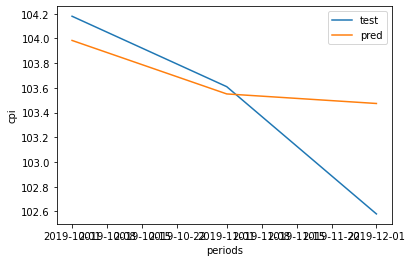

h	rmse	nrmse
1	0.1958	0.1879
3	0.5294	0.5117
6	0.5294	0.5117
12	0.5294	0.5117
reg_name:  ARK
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.23 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=1.622, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.076, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.45 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=1.905, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.760, Time=0.66 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.69 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=0.91 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=4.25 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.010, Time=0.19 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.053, Time=0.47 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.71 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=inf, Time=1.11 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf

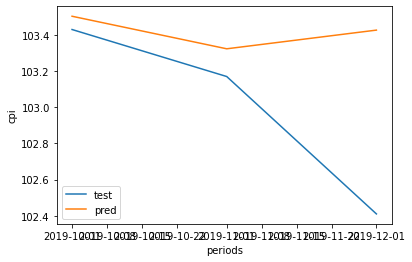

h	rmse	nrmse
1	0.0734	0.0710
3	0.5952	0.5778
6	0.5952	0.5778
12	0.5952	0.5778
reg_name:  VLG
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.79 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=1.902, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=1.216, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.11 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.932, Time=0.08 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.53 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.76 sec
 ARIMA(2,1,0)(0,1,0)[12]             : OOB=1.081, Time=0.11 sec
 ARIMA(1,1,1)(0,1,0)[12]             : OOB=1.067, Time=0.17 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=1.585, Time=0.10 sec
 ARIMA(2,1,1)(0,1,0)[12]             : OOB=1.071, Time=0.24 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : OOB=0.967, Time=0.15 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 7.398 seconds


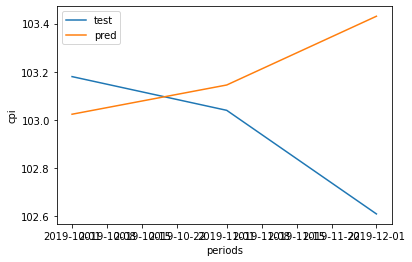

h	rmse	nrmse
1	0.1562	0.1514
3	0.4861	0.4722
6	0.4861	0.4722
12	0.4861	0.4722
reg_name:  KAG
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.55 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=2.340, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.813, Time=0.30 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.49 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.993, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=1.782, Time=0.62 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.41 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.36 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=4.19 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.462, Time=0.19 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.097, Time=0.47 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf, Time=2.72 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.45 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=1.8

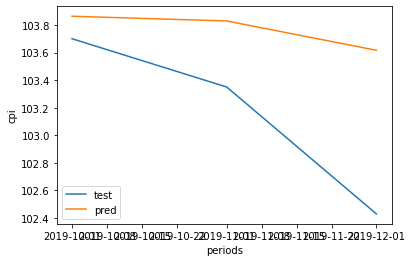

h	rmse	nrmse
1	0.1632	0.1574
3	0.7447	0.7219
6	0.7447	0.7219
12	0.7447	0.7219
reg_name:  LEN
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.90 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=1.101, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=1.132, Time=0.30 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.15 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.231, Time=0.19 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.300, Time=0.45 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.07 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=inf, Time=0.96 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf, Time=3.41 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.603, Time=0.33 sec
 ARIMA(1,1,1)(1,1,0)[12]             : OOB=1.201, Time=0.43 sec
 ARIMA(0,1,0)(1,1,0)[12] intercept   : OOB=0.172, Time=0.46 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : OOB=1.269, Time=0.10 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : OOB

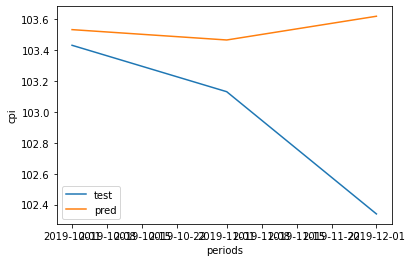

h	rmse	nrmse
1	0.1012	0.0979
3	0.7648	0.7427
6	0.7648	0.7427
12	0.7648	0.7427
reg_name:  MUR
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.18 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=3.148, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.268, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.22 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=1.268, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.542, Time=0.66 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.41 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.56 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=3.65 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.084, Time=0.22 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.040, Time=0.53 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf, Time=2.93 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.24 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.2

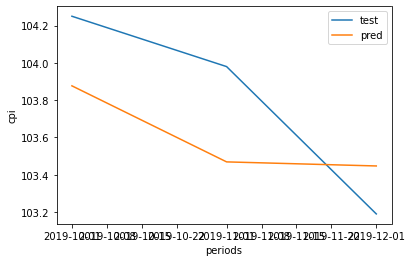

h	rmse	nrmse
1	0.3732	0.3580
3	0.3944	0.3799
6	0.3944	0.3799
12	0.3944	0.3799
reg_name:  NGR
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.06 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.408, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=1.084, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.12 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.143, Time=0.19 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.114, Time=0.45 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf, Time=4.12 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.50 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=1.730, Time=0.66 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.630, Time=0.75 sec
 ARIMA(1,1,1)(2,1,0)[12]             : OOB=1.696, Time=0.92 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : OOB=0.088, Time=1.21 sec
 ARIMA(0,1,0)(1,1,0)[12] intercept   : OOB=0.111, Time=0.57 sec
 ARIMA(0,1,0)(2,1,1)[12] intercept   : O

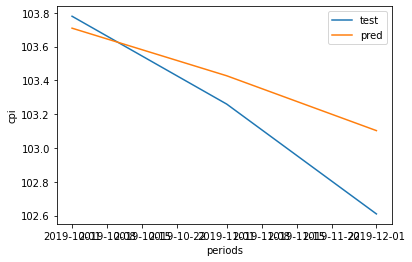

h	rmse	nrmse
1	0.0706	0.0680
3	0.3034	0.2939
6	0.3034	0.2939
12	0.3034	0.2939
reg_name:  PSK
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.84 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.949, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=1.176, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.17 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.338, Time=0.20 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.245, Time=0.46 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf, Time=2.50 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.61 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=1.163, Time=0.70 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.502, Time=0.78 sec
 ARIMA(1,1,1)(2,1,0)[12]             : OOB=1.100, Time=0.95 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : OOB=0.203, Time=1.26 sec
 ARIMA(0,1,0)(1,1,0)[12] intercept   : OOB=0.288, Time=0.48 sec
 ARIMA(0,1,0)(2,1,1)[12] intercept   : O

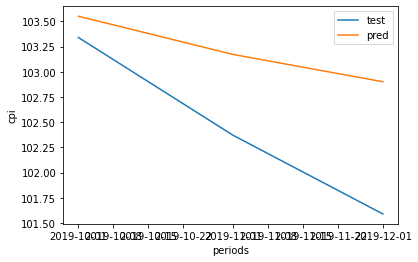

h	rmse	nrmse
1	0.2109	0.2041
3	0.8958	0.8745
6	0.8958	0.8745
12	0.8958	0.8745
reg_name:  SPB
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.91 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.883, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=1.203, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=2.64 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.097, Time=0.20 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.106, Time=0.47 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.20 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=inf, Time=0.76 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf, Time=3.37 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.561, Time=0.30 sec
 ARIMA(1,1,1)(1,1,0)[12]             : OOB=1.212, Time=0.41 sec
 ARIMA(0,1,0)(1,1,0)[12] intercept   : OOB=0.072, Time=0.47 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : OOB=1.040, Time=0.10 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : OOB

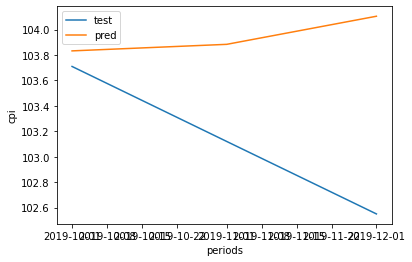

h	rmse	nrmse
1	0.1225	0.1181
3	1.0028	0.9724
6	1.0028	0.9724
12	1.0028	0.9724
reg_name:  ADY
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.17 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=7.483, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.179, Time=0.31 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.56 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=5.791, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.081, Time=0.71 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=3.60 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=2.04 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.140, Time=0.48 sec
 ARIMA(2,1,0)(2,1,0)[12]             : OOB=0.082, Time=0.98 sec
 ARIMA(1,1,1)(2,1,0)[12]             : OOB=0.004, Time=1.27 sec
 ARIMA(1,1,1)(1,1,0)[12]             : OOB=0.473, Time=0.49 sec
 ARIMA(1,1,1)(2,1,1)[12]             : OOB=inf, Time=5.18 sec
 ARIMA(1,1,1)(1,1,1)[12]             : OOB

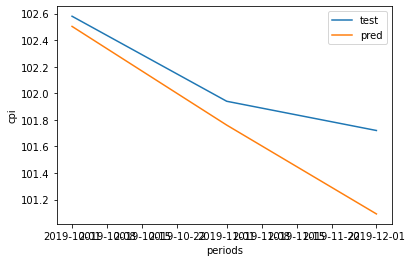

h	rmse	nrmse
1	0.0765	0.0746
3	0.3796	0.3719
6	0.3796	0.3719
12	0.3796	0.3719
reg_name:  KLM
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.47 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=6.478, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.057, Time=0.26 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.40 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=5.811, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.552, Time=0.58 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.60 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.15 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=4.98 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.076, Time=0.19 sec
 ARIMA(2,1,0)(1,1,0)[12]             : OOB=0.059, Time=0.41 sec
 ARIMA(1,1,1)(1,1,0)[12]             : OOB=0.057, Time=0.53 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.050, Time=0.26 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB

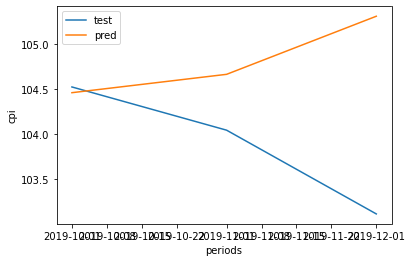

h	rmse	nrmse
1	0.0637	0.0609
3	1.3176	1.2683
6	1.3176	1.2683
12	1.3176	1.2683
reg_name:  KRA
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.10 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=4.418, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.964, Time=0.30 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.52 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=3.170, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=1.843, Time=0.63 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.83 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.12 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=4.48 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.201, Time=0.19 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.177, Time=0.49 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf, Time=3.55 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.38 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=1.1

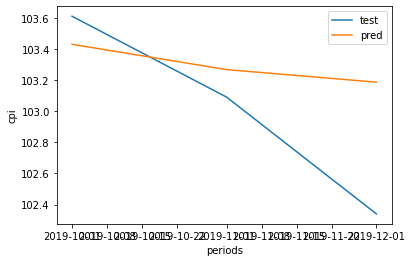

h	rmse	nrmse
1	0.1802	0.1739
3	0.5100	0.4951
6	0.5100	0.4951
12	0.5100	0.4951
reg_name:  AST
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.90 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=5.737, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=1.607, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.26 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=4.415, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=4.050, Time=0.70 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=2.47 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.63 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=4.10 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.134, Time=0.17 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.499, Time=0.43 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=0.95 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=inf, Time=0.94 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf

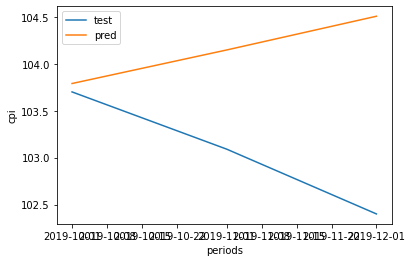

h	rmse	nrmse
1	0.0895	0.0863
3	1.3616	1.3212
6	1.3616	1.3212
12	1.3616	1.3212
reg_name:  VGG
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.28 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=6.071, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.452, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.67 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=3.838, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=1.053, Time=0.66 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.51 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.10 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=3.81 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.398, Time=0.18 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.074, Time=0.46 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf, Time=4.54 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.41 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.2

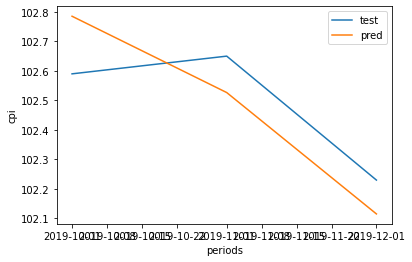

h	rmse	nrmse
1	0.1952	0.1902
3	0.1489	0.1452
6	0.1489	0.1452
12	0.1489	0.1452
reg_name:  ROS
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.94 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=5.205, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=3.181, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.17 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=3.741, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=3.926, Time=0.63 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.64 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=0.94 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=6.29 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.870, Time=0.19 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=1.297, Time=0.44 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.36 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=inf, Time=0.97 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf

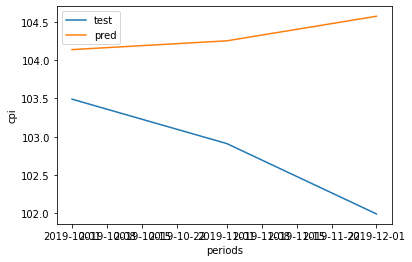

h	rmse	nrmse
1	0.6481	0.6262
3	1.7226	1.6757
6	1.7226	1.6757
12	1.7226	1.6757
reg_name:  DAG
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.02 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=6.120, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=1.827, Time=0.31 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.59 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=4.056, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=5.160, Time=0.61 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.59 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.09 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=3.32 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.236, Time=0.19 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=1.287, Time=0.44 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.18 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=inf, Time=0.63 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf

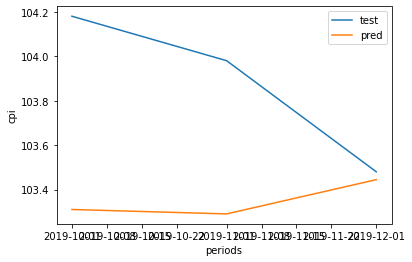

h	rmse	nrmse
1	0.8696	0.8347
3	0.6411	0.6172
6	0.6411	0.6172
12	0.6411	0.6172
reg_name:  ING
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.23 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=1.002, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.113, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=0.77 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=1.534, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=1.131, Time=0.55 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.33 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.05 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=4.04 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.084, Time=0.18 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=1.433, Time=0.47 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.26 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=inf, Time=0.63 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf

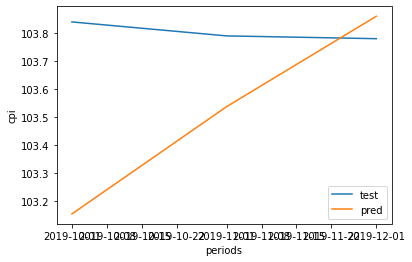

h	rmse	nrmse
1	0.6874	0.6620
3	0.4255	0.4099
6	0.4255	0.4099
12	0.4255	0.4099
reg_name:  KAB
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.05 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=1.565, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=1.853, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.76 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.804, Time=0.17 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.877, Time=0.45 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=0.94 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=inf, Time=0.93 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf, Time=4.07 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=1.726, Time=0.27 sec
 ARIMA(1,1,1)(1,1,0)[12]             : OOB=1.688, Time=0.46 sec
 ARIMA(0,1,0)(1,1,0)[12] intercept   : OOB=0.585, Time=0.43 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : OOB=1.866, Time=0.10 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : OOB

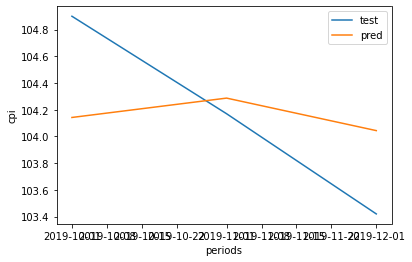

h	rmse	nrmse
1	0.7579	0.7225
3	0.5707	0.5479
6	0.5707	0.5479
12	0.5707	0.5479
reg_name:  KAO
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.61 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=5.690, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=2.852, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.21 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=2.703, Time=0.08 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.26 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.79 sec
 ARIMA(2,1,0)(0,1,0)[12]             : OOB=2.774, Time=0.13 sec
 ARIMA(1,1,1)(0,1,0)[12]             : OOB=2.975, Time=0.15 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=3.851, Time=0.09 sec
 ARIMA(2,1,1)(0,1,0)[12]             : OOB=2.912, Time=0.23 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : OOB=2.804, Time=0.16 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 7.056 seconds


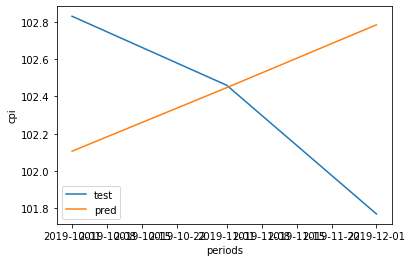

h	rmse	nrmse
1	0.7238	0.7039
3	0.7193	0.7028
6	0.7193	0.7028
12	0.7193	0.7028
reg_name:  NOR
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.38 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=5.642, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.206, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.82 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=5.125, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=1.149, Time=0.77 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.41 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.21 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=3.85 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.175, Time=0.18 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.062, Time=0.42 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf, Time=3.46 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.39 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.7

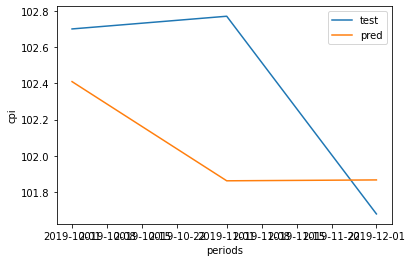

h	rmse	nrmse
1	0.2905	0.2829
3	0.5606	0.5476
6	0.5606	0.5476
12	0.5606	0.5476
reg_name:  STA
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.82 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=6.792, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.731, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.47 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=6.471, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=3.298, Time=0.62 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=2.16 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.16 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=4.73 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.101, Time=0.18 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.539, Time=0.46 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.22 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=inf, Time=0.89 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf

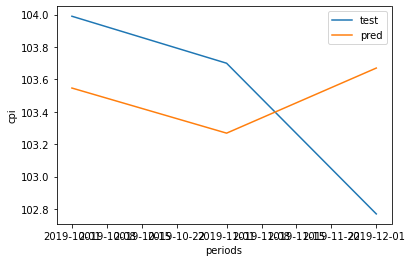

h	rmse	nrmse
1	0.4431	0.4261
3	0.6306	0.6093
6	0.6306	0.6093
12	0.6306	0.6093
reg_name:  BAS
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.54 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=7.759, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.254, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.70 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=7.923, Time=0.16 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=2.477, Time=0.63 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.48 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.18 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=3.60 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.029, Time=0.21 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.415, Time=0.53 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.33 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=inf, Time=1.15 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf

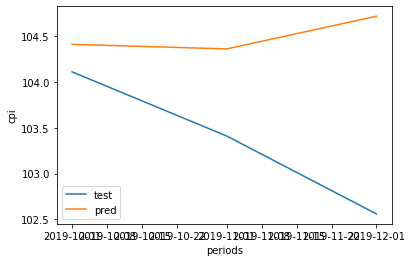

h	rmse	nrmse
1	0.3003	0.2885
3	1.3718	1.3272
6	1.3718	1.3272
12	1.3718	1.3272
reg_name:  MAR
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.59 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=1.666, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=1.563, Time=0.30 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.66 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=1.393, Time=0.09 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.25 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=2.09 sec
 ARIMA(2,1,0)(0,1,0)[12]             : OOB=1.424, Time=0.13 sec
 ARIMA(1,1,1)(0,1,0)[12]             : OOB=1.378, Time=0.18 sec
 ARIMA(1,1,1)(1,1,0)[12]             : OOB=1.608, Time=0.40 sec
 ARIMA(1,1,1)(1,1,1)[12]             : OOB=inf, Time=2.60 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=1.446, Time=0.11 sec
 ARIMA(2,1,1)(0,1,0)[12]             : OOB=1.371, Time=0.26 sec
 ARIMA(2,1,1)(1,1,0)[12]             : OOB

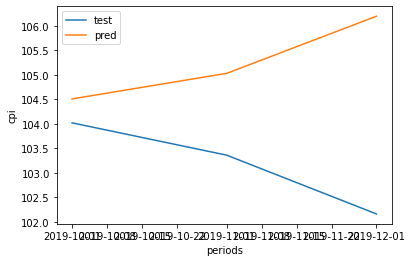

h	rmse	nrmse
1	0.4886	0.4698
3	2.5385	2.4603
6	2.5385	2.4603
12	2.5385	2.4603
reg_name:  MOR
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.69 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=1.122, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.448, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.44 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.740, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=1.600, Time=0.74 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.60 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.68 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=3.92 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.018, Time=0.19 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.252, Time=0.47 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.06 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=inf, Time=0.97 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf

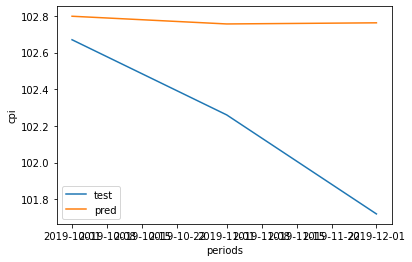

h	rmse	nrmse
1	0.1282	0.1249
3	0.6706	0.6561
6	0.6706	0.6561
12	0.6706	0.6561
reg_name:  TAT
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.03 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.375, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.196, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.45 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.277, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.038, Time=0.65 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=3.47 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.44 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.002, Time=0.53 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.051, Time=0.19 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf, Time=3.03 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.27 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.019, Time=0.71 sec
 ARIMA(1,1,1)(2,1,0)[12]             : OOB=0

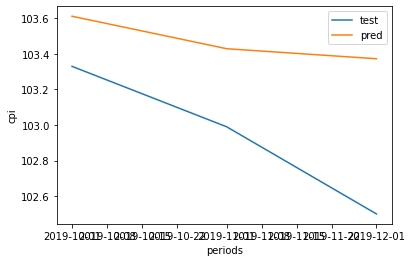

h	rmse	nrmse
1	0.2820	0.2729
3	0.5872	0.5704
6	0.5872	0.5704
12	0.5872	0.5704
reg_name:  UDM
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.23 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.942, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=2.174, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.53 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.873, Time=0.18 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.538, Time=0.46 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf, Time=2.93 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.52 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=2.251, Time=0.68 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.715, Time=0.85 sec
 ARIMA(1,1,1)(2,1,0)[12]             : OOB=1.567, Time=1.03 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : OOB=0.458, Time=1.20 sec
 ARIMA(0,1,0)(1,1,0)[12] intercept   : OOB=0.756, Time=0.49 sec
 ARIMA(0,1,0)(2,1,1)[12] intercept   : O

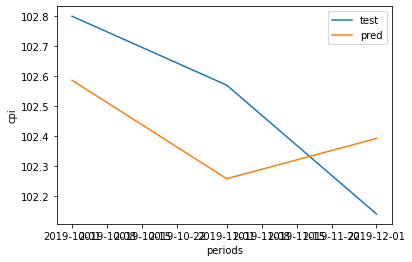

h	rmse	nrmse
1	0.2138	0.2080
3	0.2625	0.2561
6	0.2625	0.2561
12	0.2625	0.2561
reg_name:  CHV
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.81 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=7.270, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.896, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.41 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=5.102, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=1.167, Time=0.64 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.61 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.20 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=4.17 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.796, Time=0.18 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.549, Time=0.43 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf, Time=2.99 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.01 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.8

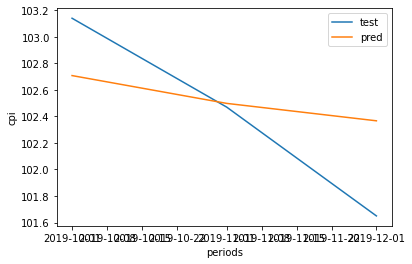

h	rmse	nrmse
1	0.4322	0.4190
3	0.4836	0.4722
6	0.4836	0.4722
12	0.4836	0.4722
reg_name:  PER
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.68 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.553, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=1.419, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.21 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.780, Time=0.18 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=inf, Time=0.85 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.52 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.680, Time=0.11 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=1.020, Time=0.12 sec
 ARIMA(1,1,1)(0,1,0)[12]             : OOB=0.979, Time=0.15 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : OOB=0.686, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,1,0)[12]          
Total fit time: 6.279 seconds


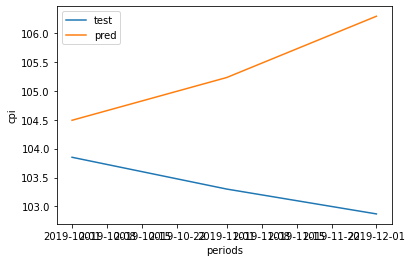

h	rmse	nrmse
1	0.6400	0.6163
3	2.2972	2.2229
6	2.2972	2.2229
12	2.2972	2.2229
reg_name:  KIR
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.50 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=4.523, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.736, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.76 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=2.804, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.929, Time=0.74 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.56 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.11 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=3.41 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.032, Time=0.20 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.041, Time=0.45 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.34 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=inf, Time=0.96 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf

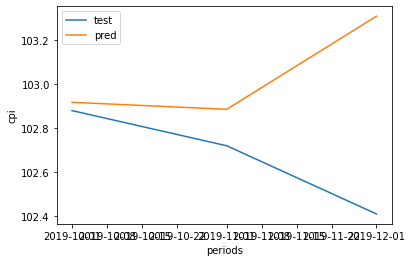

h	rmse	nrmse
1	0.0377	0.0367
3	0.5284	0.5146
6	0.5284	0.5146
12	0.5284	0.5146
reg_name:  NIZ
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.87 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=2.328, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=3.847, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.34 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.111, Time=0.17 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.146, Time=0.48 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.57 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=inf, Time=1.11 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf, Time=2.78 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=1.779, Time=0.32 sec
 ARIMA(1,1,1)(1,1,0)[12]             : OOB=4.066, Time=0.41 sec
 ARIMA(0,1,0)(1,1,0)[12] intercept   : OOB=0.080, Time=0.47 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : OOB=2.531, Time=0.10 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : OOB

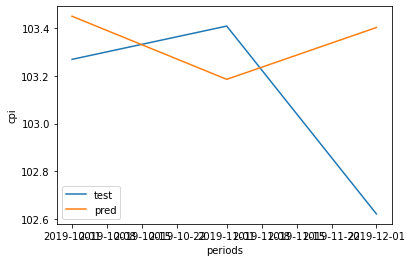

h	rmse	nrmse
1	0.1813	0.1756
3	0.4822	0.4677
6	0.4822	0.4677
12	0.4822	0.4677
reg_name:  ORE
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.50 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=3.510, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=1.601, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.34 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=2.614, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=2.397, Time=0.66 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.45 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.36 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=4.10 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.096, Time=0.20 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.122, Time=0.53 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.07 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=inf, Time=0.89 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf

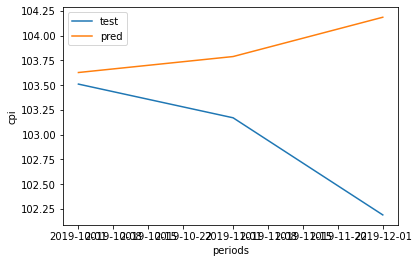

h	rmse	nrmse
1	0.1169	0.1129
3	1.2075	1.1728
6	1.2075	1.1728
12	1.2075	1.1728
reg_name:  PNZ
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.47 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=5.795, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=1.295, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.07 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=4.280, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=3.461, Time=0.66 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.56 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.07 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=3.71 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.013, Time=0.18 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.101, Time=0.46 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.31 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=inf, Time=0.92 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf

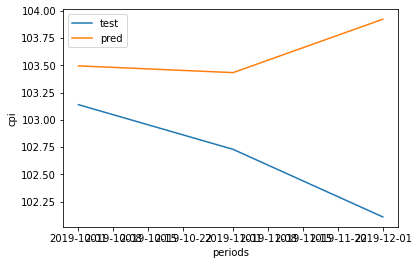

h	rmse	nrmse
1	0.3561	0.3453
3	1.1421	1.1125
6	1.1421	1.1125
12	1.1421	1.1125
reg_name:  SAM
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.95 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=4.531, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.858, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.13 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=2.022, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=2.604, Time=0.62 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.49 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.28 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=3.83 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.034, Time=0.19 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.516, Time=0.47 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=0.87 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=inf, Time=1.17 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf

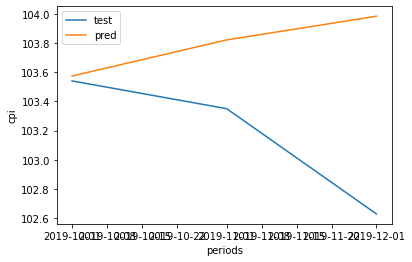

h	rmse	nrmse
1	0.0333	0.0322
3	0.8270	0.8015
6	0.8270	0.8015
12	0.8270	0.8015
reg_name:  SAR
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.54 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=2.150, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.547, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.45 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.700, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.771, Time=0.68 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.42 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.60 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=4.45 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.171, Time=0.20 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.160, Time=0.44 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf, Time=3.00 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.09 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.1

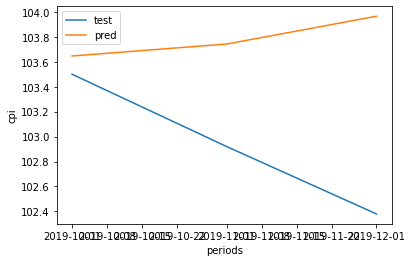

h	rmse	nrmse
1	0.1463	0.1413
3	1.0343	1.0049
6	1.0343	1.0049
12	1.0343	1.0049
reg_name:  ULY
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.49 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=4.303, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.214, Time=0.25 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.51 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=5.538, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.415, Time=0.67 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=2.01 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.04 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=3.19 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.036, Time=0.18 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.021, Time=0.45 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf, Time=2.71 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.62 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.1

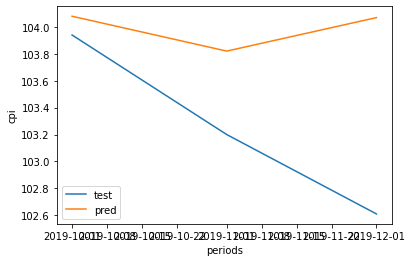

h	rmse	nrmse
1	0.1394	0.1341
3	0.9189	0.8900
6	0.9189	0.8900
12	0.9189	0.8900
reg_name:  KUG
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.52 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.968, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=1.008, Time=0.30 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.18 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.384, Time=0.18 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.820, Time=0.48 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.17 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=inf, Time=0.95 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf, Time=2.82 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.550, Time=0.29 sec
 ARIMA(1,1,1)(1,1,0)[12]             : OOB=0.990, Time=0.40 sec
 ARIMA(0,1,0)(1,1,0)[12] intercept   : OOB=0.307, Time=0.47 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : OOB=1.105, Time=0.11 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : OOB

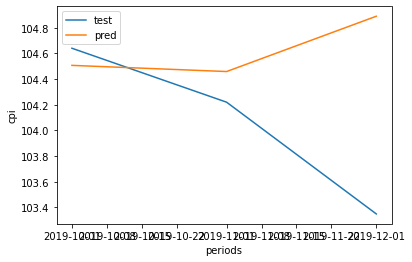

h	rmse	nrmse
1	0.1334	0.1274
3	0.9025	0.8672
6	0.9025	0.8672
12	0.9025	0.8672
reg_name:  SVE
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.30 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.969, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.465, Time=0.36 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.34 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=1.045, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=1.189, Time=0.71 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=2.21 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.10 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=4.35 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.097, Time=0.21 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.343, Time=0.47 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.21 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=inf, Time=1.53 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf

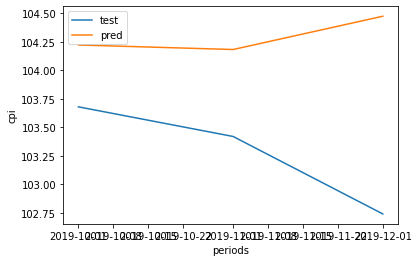

h	rmse	nrmse
1	0.5433	0.5240
3	1.1387	1.1025
6	1.1387	1.1025
12	1.1387	1.1025
reg_name:  TYU
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.79 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.101, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.056, Time=0.33 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.47 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.252, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.009, Time=0.75 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=3.88 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.61 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.058, Time=0.50 sec
 ARIMA(2,1,0)(2,1,0)[12]             : OOB=0.009, Time=1.05 sec
 ARIMA(1,1,1)(2,1,0)[12]             : OOB=0.010, Time=1.05 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.027, Time=0.66 sec
 ARIMA(2,1,1)(2,1,0)[12]             : OOB=0.013, Time=2.30 sec
 ARIMA(1,1,0)(2,1,0)[12] intercept   : O

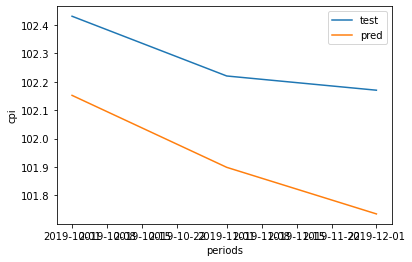

h	rmse	nrmse
1	0.2781	0.2715
3	0.3510	0.3432
6	0.3510	0.3432
12	0.3510	0.3432
reg_name:  CHE
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.03 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=1.065, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.073, Time=0.30 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.22 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.271, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.633, Time=0.68 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.56 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.40 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=3.94 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.048, Time=0.20 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.042, Time=0.51 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf, Time=2.82 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.44 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.2

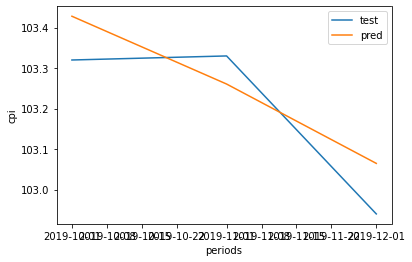

h	rmse	nrmse
1	0.1080	0.1045
3	0.1033	0.1001
6	0.1033	0.1001
12	0.1033	0.1001
reg_name:  ALI
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.84 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=2.211, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.057, Time=0.26 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.28 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=1.507, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.073, Time=0.73 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.91 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.29 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=4.22 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.513, Time=0.19 sec
 ARIMA(2,1,0)(1,1,0)[12]             : OOB=0.052, Time=0.37 sec
 ARIMA(2,1,0)(0,1,0)[12]             : OOB=1.536, Time=0.11 sec
 ARIMA(2,1,0)(2,1,0)[12]             : OOB=0.086, Time=1.01 sec
 ARIMA(2,1,0)(1,1,1)[12]             : OOB

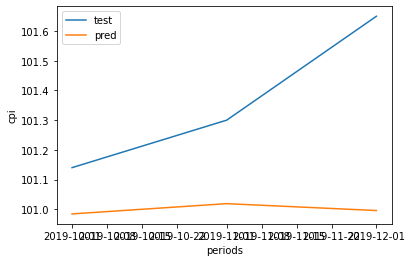

h	rmse	nrmse
1	0.1559	0.1541
3	0.4210	0.4153
6	0.4210	0.4153
12	0.4210	0.4153
reg_name:  TUV
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.96 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.892, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=1.706, Time=0.30 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.24 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.145, Time=0.20 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.493, Time=0.48 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.14 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=inf, Time=0.92 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf, Time=3.37 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.754, Time=0.28 sec
 ARIMA(1,1,1)(1,1,0)[12]             : OOB=1.560, Time=0.37 sec
 ARIMA(0,1,0)(1,1,0)[12] intercept   : OOB=0.140, Time=0.53 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : OOB=0.929, Time=0.10 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : OOB

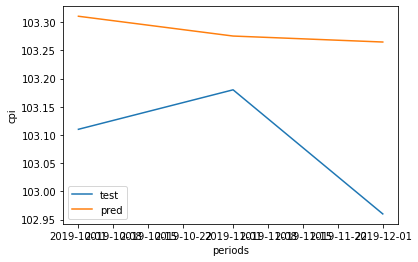

h	rmse	nrmse
1	0.2004	0.1944
3	0.2176	0.2111
6	0.2176	0.2111
12	0.2176	0.2111
reg_name:  KHK
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.77 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=3.626, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.190, Time=0.32 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.25 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=2.760, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.203, Time=0.67 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.62 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.09 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=3.66 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.505, Time=0.18 sec
 ARIMA(2,1,0)(1,1,0)[12]             : OOB=0.218, Time=0.45 sec
 ARIMA(1,1,1)(1,1,0)[12]             : OOB=0.212, Time=0.46 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.254, Time=0.33 sec
 ARIMA(2,1,1)(1,1,0)[12]             : OOB

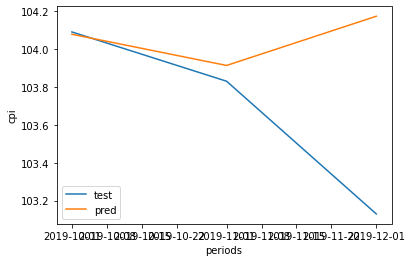

h	rmse	nrmse
1	0.0122	0.0117
3	0.6041	0.5826
6	0.6041	0.5826
12	0.6041	0.5826
reg_name:  ALT
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.46 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=1.811, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.687, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.08 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=1.081, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=1.910, Time=0.65 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.81 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.26 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=4.43 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.121, Time=0.19 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.423, Time=0.52 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.58 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=inf, Time=0.81 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf

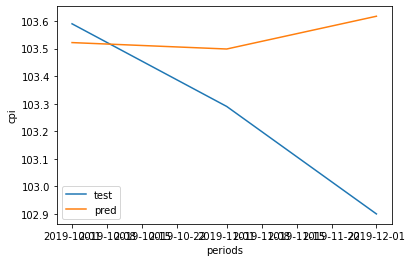

h	rmse	nrmse
1	0.0682	0.0658
3	0.4331	0.4195
6	0.4331	0.4195
12	0.4331	0.4195
reg_name:  KYA
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.14 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=2.421, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.342, Time=0.33 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.10 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=1.153, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.985, Time=0.76 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.72 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.28 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=4.52 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.147, Time=0.19 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.008, Time=0.47 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf, Time=3.63 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.43 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.2

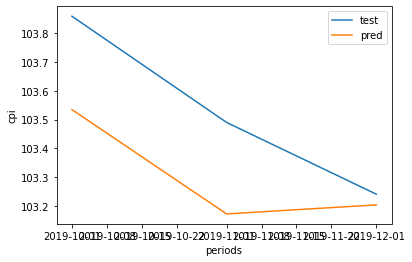

h	rmse	nrmse
1	0.3252	0.3131
3	0.2638	0.2548
6	0.2638	0.2548
12	0.2638	0.2548
reg_name:  IRK
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.12 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.996, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.164, Time=0.31 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.20 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.931, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.470, Time=0.76 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.57 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.27 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=3.84 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.166, Time=0.20 sec
 ARIMA(2,1,0)(1,1,0)[12]             : OOB=0.141, Time=0.47 sec
 ARIMA(2,1,0)(0,1,0)[12]             : OOB=0.945, Time=0.13 sec
 ARIMA(2,1,0)(2,1,0)[12]             : OOB=0.383, Time=1.07 sec
 ARIMA(2,1,0)(1,1,1)[12]             : OOB

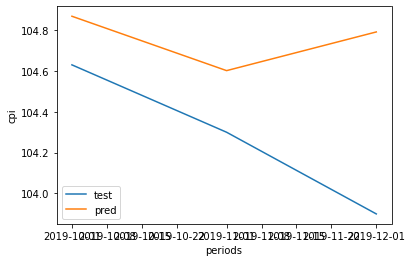

h	rmse	nrmse
1	0.2381	0.2276
3	0.5604	0.5374
6	0.5604	0.5374
12	0.5604	0.5374
reg_name:  KEM
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.03 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=3.188, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.070, Time=0.30 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.94 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=2.370, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=1.132, Time=0.79 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.59 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.05 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=3.66 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.564, Time=0.18 sec
 ARIMA(2,1,0)(1,1,0)[12]             : OOB=0.073, Time=0.45 sec
 ARIMA(1,1,1)(1,1,0)[12]             : OOB=0.072, Time=0.68 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.244, Time=0.34 sec
 ARIMA(2,1,1)(1,1,0)[12]             : OOB

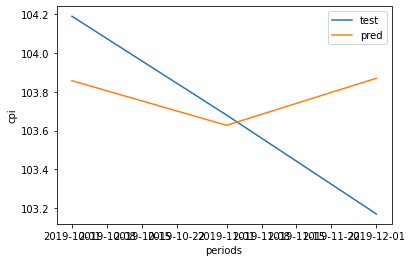

h	rmse	nrmse
1	0.3327	0.3193
3	0.4484	0.4325
6	0.4484	0.4325
12	0.4484	0.4325
reg_name:  NVS
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.54 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=2.130, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.076, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.40 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=3.063, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.216, Time=0.69 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.33 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.83 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=4.02 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.090, Time=0.18 sec
 ARIMA(2,1,0)(1,1,0)[12]             : OOB=0.086, Time=0.39 sec
 ARIMA(1,1,1)(1,1,0)[12]             : OOB=0.083, Time=0.39 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.162, Time=0.30 sec
 ARIMA(2,1,1)(1,1,0)[12]             : OOB

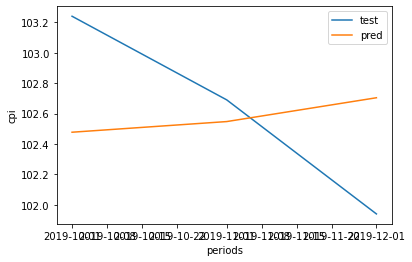

h	rmse	nrmse
1	0.7627	0.7388
3	0.6287	0.6126
6	0.6287	0.6126
12	0.6287	0.6126
reg_name:  OMS
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.84 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=7.535, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.024, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.52 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=11.349, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=1.838, Time=0.69 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.47 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.36 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=4.57 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.084, Time=0.19 sec
 ARIMA(2,1,0)(1,1,0)[12]             : OOB=0.039, Time=0.40 sec
 ARIMA(1,1,1)(1,1,0)[12]             : OOB=0.037, Time=0.41 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0.014, Time=0.30 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OO

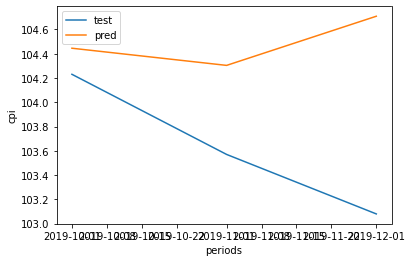

h	rmse	nrmse
1	0.2148	0.2061
3	1.0385	1.0021
6	1.0385	1.0021
12	1.0385	1.0021
reg_name:  TOM
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.38 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=1.495, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.229, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.83 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.676, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.717, Time=0.68 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.73 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.17 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=3.82 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.052, Time=0.23 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.083, Time=0.51 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.16 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=inf, Time=0.98 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf

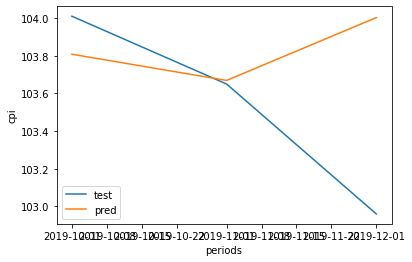

h	rmse	nrmse
1	0.2017	0.1939
3	0.6133	0.5923
6	0.6133	0.5923
12	0.6133	0.5923
reg_name:  BUR
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.85 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=1.059, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.281, Time=0.31 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.33 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.581, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.724, Time=0.69 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.43 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.33 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=3.24 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.164, Time=0.19 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.013, Time=0.48 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf, Time=2.98 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.25 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.1

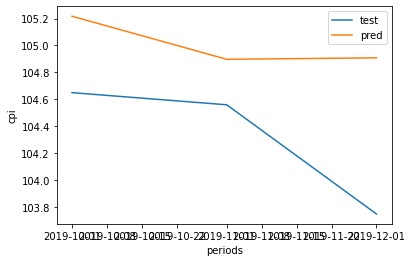

h	rmse	nrmse
1	0.5671	0.5419
3	0.7697	0.7379
6	0.7697	0.7379
12	0.7697	0.7379
reg_name:  ZAB
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.76 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.622, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.042, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.43 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.495, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.277, Time=0.69 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.80 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.47 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=4.50 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.012, Time=0.29 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.120, Time=0.45 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.09 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=inf, Time=0.83 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf

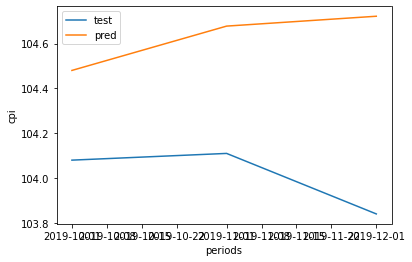

h	rmse	nrmse
1	0.4003	0.3847
3	0.6484	0.6234
6	0.6484	0.6234
12	0.6484	0.6234
reg_name:  SAH
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.03 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.020, Time=0.14 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.005, Time=0.38 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=0.70 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.014, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.130, Time=0.98 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.82 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=0.73 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=5.32 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.133, Time=0.20 sec
 ARIMA(2,1,0)(1,1,0)[12]             : OOB=0.005, Time=0.49 sec
 ARIMA(2,1,0)(0,1,0)[12]             : OOB=0.015, Time=0.15 sec
 ARIMA(2,1,0)(2,1,0)[12]             : OOB=0.073, Time=1.23 sec
 ARIMA(2,1,0)(1,1,1)[12]             : OOB

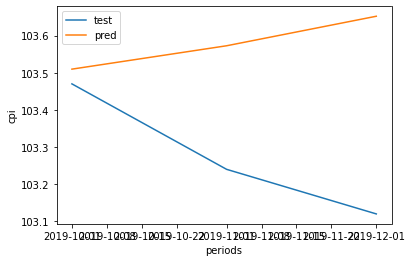

h	rmse	nrmse
1	0.0397	0.0383
3	0.3630	0.3515
6	0.3630	0.3515
12	0.3630	0.3515
reg_name:  KAM
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.58 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=1.723, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.385, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.20 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=1.447, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.073, Time=0.66 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=3.42 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.64 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.024, Time=0.50 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.324, Time=0.22 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf, Time=3.08 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.46 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.030, Time=0.68 sec
 ARIMA(1,1,1)(2,1,0)[12]             : OOB=0

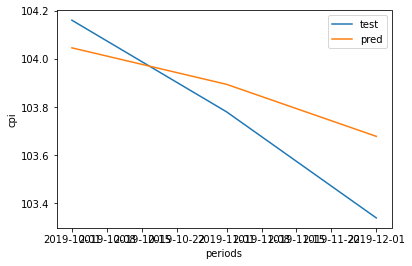

h	rmse	nrmse
1	0.1145	0.1099
3	0.2165	0.2087
6	0.2165	0.2087
12	0.2165	0.2087
reg_name:  PRI
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.95 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=1.075, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.262, Time=0.33 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.51 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.455, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.006, Time=0.77 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=4.24 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.67 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.079, Time=0.46 sec
 ARIMA(2,1,0)(2,1,0)[12]             : OOB=0.007, Time=1.13 sec
 ARIMA(1,1,1)(2,1,0)[12]             : OOB=0.007, Time=0.95 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.064, Time=0.81 sec
 ARIMA(2,1,1)(2,1,0)[12]             : OOB=inf, Time=4.00 sec
 ARIMA(1,1,0)(2,1,0)[12] intercept   : OOB

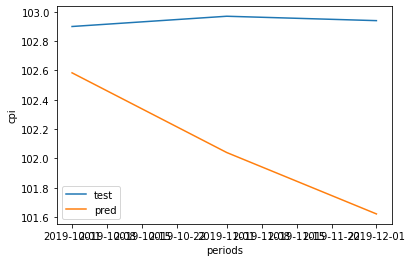

h	rmse	nrmse
1	0.3162	0.3073
3	0.9496	0.9225
6	0.9496	0.9225
12	0.9496	0.9225
reg_name:  KHA
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=2.05 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.463, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.398, Time=0.30 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.35 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=1.150, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.280, Time=0.68 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=4.54 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.40 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.431, Time=0.49 sec
 ARIMA(2,1,0)(2,1,0)[12]             : OOB=0.306, Time=1.00 sec
 ARIMA(1,1,1)(2,1,0)[12]             : OOB=0.298, Time=0.89 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.379, Time=0.77 sec
 ARIMA(2,1,1)(2,1,0)[12]             : OOB=inf, Time=7.09 sec
 ARIMA(1,1,0)(2,1,0)[12] intercept   : OOB

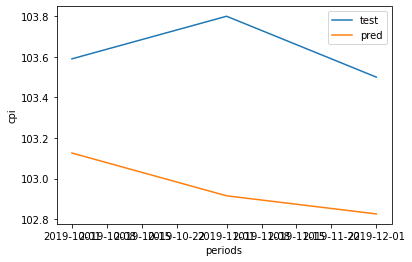

h	rmse	nrmse
1	0.4642	0.4481
3	0.6960	0.6716
6	0.6960	0.6716
12	0.6960	0.6716
reg_name:  AMU
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.66 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.331, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.078, Time=0.34 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.74 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.285, Time=0.12 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.007, Time=0.65 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=4.45 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.52 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.096, Time=0.55 sec
 ARIMA(2,1,0)(2,1,0)[12]             : OOB=0.008, Time=0.96 sec
 ARIMA(1,1,1)(2,1,0)[12]             : OOB=0.008, Time=0.96 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.041, Time=0.75 sec
 ARIMA(2,1,1)(2,1,0)[12]             : OOB=0.008, Time=1.91 sec
 ARIMA(1,1,0)(2,1,0)[12] intercept   : O

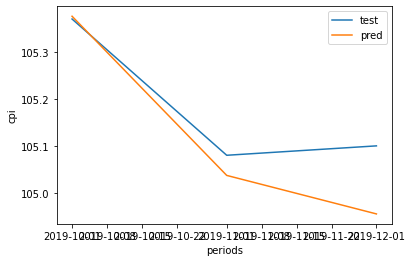

h	rmse	nrmse
1	0.0059	0.0056
3	0.0873	0.0830
6	0.0873	0.0830
12	0.0873	0.0830
reg_name:  MAG
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.86 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=6.256, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=1.473, Time=0.28 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.01 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=6.376, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.147, Time=0.64 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=3.72 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.59 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.123, Time=0.49 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=1.747, Time=0.19 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf, Time=3.07 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.24 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.154, Time=0.78 sec
 ARIMA(1,1,1)(2,1,0)[12]             : OOB=0

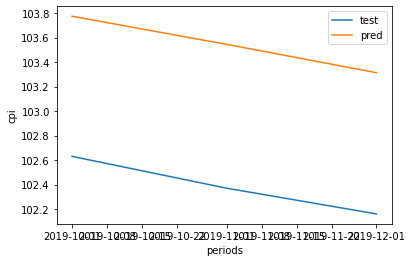

h	rmse	nrmse
1	1.1448	1.1155
3	1.1578	1.1308
6	1.1578	1.1308
12	1.1578	1.1308
reg_name:  SAK
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.91 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.827, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=0.529, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.20 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=1.243, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : OOB=0.035, Time=0.67 sec
 ARIMA(1,1,0)(2,1,1)[12]             : OOB=inf, Time=3.89 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=2.79 sec
 ARIMA(0,1,0)(2,1,0)[12]             : OOB=0.027, Time=0.47 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=0.120, Time=0.19 sec
 ARIMA(0,1,0)(2,1,1)[12]             : OOB=inf, Time=3.30 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.13 sec
 ARIMA(0,1,1)(2,1,0)[12]             : OOB=0.003, Time=0.70 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=0

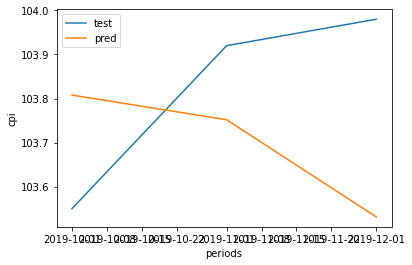

h	rmse	nrmse
1	0.2579	0.2490
3	0.3142	0.3026
6	0.3142	0.3026
12	0.3142	0.3026
reg_name:  JEW
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.79 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.271, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=1.961, Time=0.30 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.26 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=1.521, Time=0.21 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=inf, Time=0.92 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.09 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.427, Time=0.09 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.378, Time=0.10 sec
 ARIMA(1,1,1)(0,1,0)[12]             : OOB=0.396, Time=0.17 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : OOB=0.260, Time=0.11 sec
 ARIMA(0,1,0)(1,1,0)[12] intercept   : OOB=1.496, Time=0.52 sec
 ARIMA(0,1,0)(0,1,1)[12] intercept   : OOB=inf, Time=1.48 sec
 ARIMA(0,1,0)(1,1,1)[12] intercept   : OOB

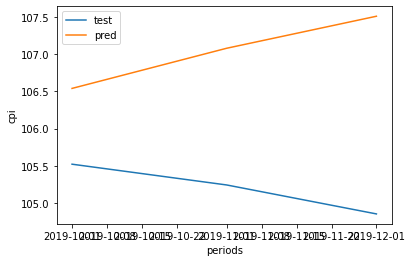

h	rmse	nrmse
1	1.0211	0.9677
3	1.9605	1.8635
6	1.9605	1.8635
12	1.9605	1.8635
reg_name:  CHU
Performing stepwise search to minimize oob
 ARIMA(1,1,1)(0,1,1)[12]             : OOB=inf, Time=1.31 sec
 ARIMA(0,1,0)(0,1,0)[12]             : OOB=0.111, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : OOB=1.286, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : OOB=inf, Time=1.41 sec
 ARIMA(0,1,0)(1,1,0)[12]             : OOB=1.391, Time=0.17 sec
 ARIMA(0,1,0)(0,1,1)[12]             : OOB=inf, Time=0.70 sec
 ARIMA(0,1,0)(1,1,1)[12]             : OOB=inf, Time=1.05 sec
 ARIMA(1,1,0)(0,1,0)[12]             : OOB=0.099, Time=0.08 sec
 ARIMA(1,1,0)(0,1,1)[12]             : OOB=inf, Time=1.08 sec
 ARIMA(1,1,0)(1,1,1)[12]             : OOB=inf, Time=1.45 sec
 ARIMA(2,1,0)(0,1,0)[12]             : OOB=0.150, Time=0.13 sec
 ARIMA(1,1,1)(0,1,0)[12]             : OOB=inf, Time=0.53 sec
 ARIMA(0,1,1)(0,1,0)[12]             : OOB=0.093, Time=0.10 sec
 ARIMA(0,1,1)(1,1,0)[12]             : OOB=1.2

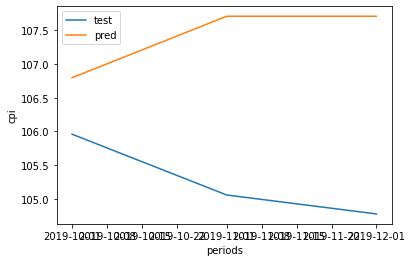

h	rmse	nrmse
1	0.8358	0.7888
3	2.3281	2.2116
6	2.3281	2.2116
12	2.3281	2.2116


In [109]:

for reg_name in reg_names:
  print('======================================================================')
  print('reg_name: ', reg_name)

  train = data[:-test_len][reg_name]
  test = data[-test_len:][reg_name]

  # find best params
  stepwise_model = auto_arima(train, start_p=1, start_q=1, max_p=2, max_q=2, m=12, start_P=0, seasonal=True, \
                              d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True, \
                              out_of_sample_size = test_len, scoring = 'mse', information_criterion = 'oob')
  
  # fit model
  stepwise_model.fit(train)

  # make predict
  predict = stepwise_model.predict(n_periods=test_len)

  # draw results
  predict = pd.DataFrame(predict, index = test.index, columns=[reg_name])
  plot_series(test, predict[reg_name])

  # print results
  rmse_reg, nrmse_reg = get_metric(test.values, predict[reg_name].values, horizon=[1,3,6,12])

  rmse_list.append(rmse_reg)
  nrmse_list.append(nrmse_reg)


Для ARIMA моделей попробовать взять разность логарифмов уровня цен. (Проверить на стационарность исходные ряды). Пока реализовано для исходных рядов.

## region average

In [110]:
print('metric\horizon\th=1\th=3\th=6\th=12')
mean_rmse_list = np.mean(rmse_list, axis=0)
print('rmse\t\t{:.4f}\t{:.4f}\t{:.4f}\t{:.4f}'.format(mean_rmse_list[0], mean_rmse_list[1], mean_rmse_list[2], mean_rmse_list[3]))
mean_nrmse_list = np.mean(nrmse_list, axis=0)
print('nrmse (%)\t{:.2f}%\t{:.2f}%\t{:.2f}%\t{:.2f}%'.format(mean_nrmse_list[0], mean_nrmse_list[1], mean_nrmse_list[2], mean_nrmse_list[3]))

metric\horizon	h=1	h=3	h=6	h=12
rmse		0.3133	0.7835	0.7835	0.7835
nrmse (%)	0.30%	0.76%	0.76%	0.76%


## Training with sliding window (unrealised yet)

In [ ]:
"""future_forecast = []

for l in range(test_len,0,-1):
  train = data[reg_name][:-l]
  # test = data_train["cpi_sfo"].[data.index >= '2018-{:02}-01'.format(month)]

  stepwise_model.fit(train)
  future_forecast.append(stepwise_model.predict(n_periods=1))


future_forecast = pd.DataFrame(np.array(future_forecast), index = test.index, columns=[reg_name])
"""

In [ ]:
"""
print('rmse: {:.4f}'.format(mean_squared_error(test_data[reg_name].values, future_forecast[reg_name].values) ** 0.5))
print('normed rmse: {:.4f}%'.format(mean_squared_error(test_data[reg_name].values, 
                            future_forecast[reg_name].values) ** 0.5 / np.mean(test_data[reg_name].values) * 100))
"""  

# Extreme Gradient Boosting
 CPI time series only
 
 separate reg models

In [ ]:
from xgboost import XGBRegressor

## Training once, forecast for test_len period

reg_name:  RF
CPU times: user 1.57 ms, sys: 0 ns, total: 1.57 ms
Wall time: 1.59 ms


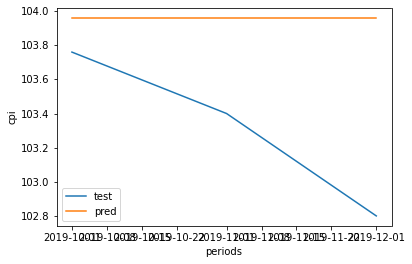

h	rmse	nrmse
1	0.1984	0.1912
3	0.7512	0.7271
6	0.7512	0.7271
12	0.7512	0.7271
reg_name:  BEL
CPU times: user 65 µs, sys: 45 µs, total: 110 µs
Wall time: 116 µs


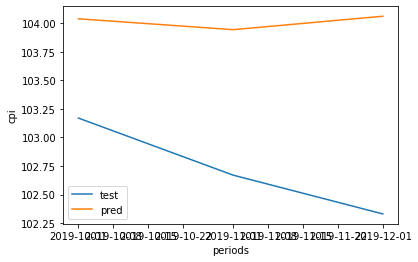

h	rmse	nrmse
1	0.8702	0.8435
3	1.3397	1.3042
6	1.3397	1.3042
12	1.3397	1.3042
reg_name:  BRY
CPU times: user 60 µs, sys: 41 µs, total: 101 µs
Wall time: 105 µs


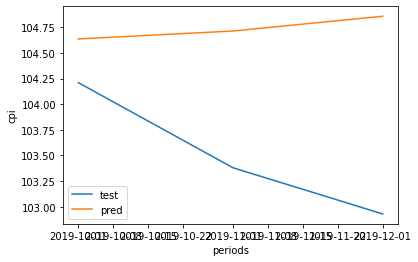

h	rmse	nrmse
1	0.4258	0.4086
3	1.3750	1.3284
6	1.3750	1.3284
12	1.3750	1.3284
reg_name:  VLA
CPU times: user 76 µs, sys: 52 µs, total: 128 µs
Wall time: 133 µs


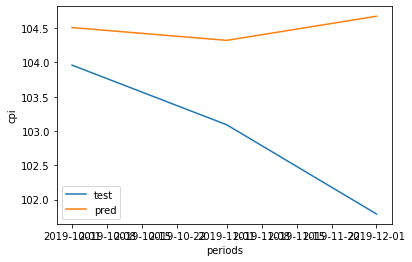

h	rmse	nrmse
1	0.5479	0.5270
3	1.8374	1.7848
6	1.8374	1.7848
12	1.8374	1.7848
reg_name:  VOR
CPU times: user 109 µs, sys: 0 ns, total: 109 µs
Wall time: 113 µs


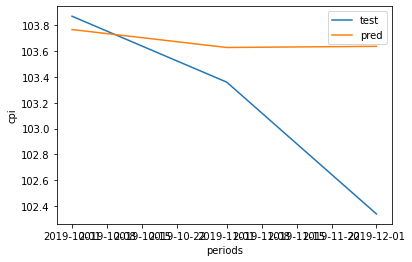

h	rmse	nrmse
1	0.1031	0.0992
3	0.7670	0.7433
6	0.7670	0.7433
12	0.7670	0.7433
reg_name:  IVA
CPU times: user 330 µs, sys: 232 µs, total: 562 µs
Wall time: 437 µs


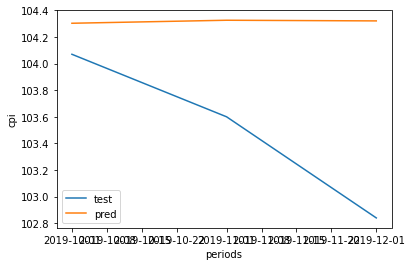

h	rmse	nrmse
1	0.2333	0.2241
3	0.9617	0.9291
6	0.9617	0.9291
12	0.9617	0.9291
reg_name:  KAL
CPU times: user 318 µs, sys: 224 µs, total: 542 µs
Wall time: 435 µs


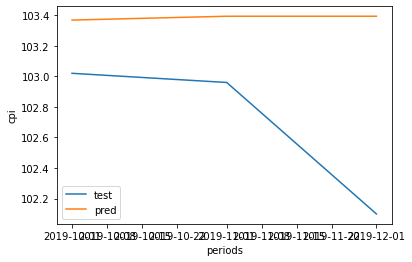

h	rmse	nrmse
1	0.3482	0.3380
3	0.8128	0.7914
6	0.8128	0.7914
12	0.8128	0.7914
reg_name:  KOS
CPU times: user 57 µs, sys: 40 µs, total: 97 µs
Wall time: 101 µs


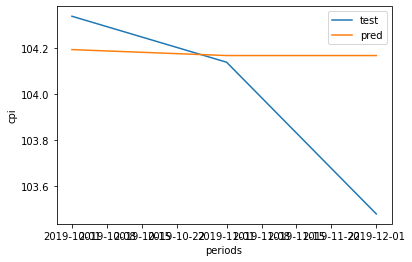

h	rmse	nrmse
1	0.1452	0.1391
3	0.4069	0.3913
6	0.4069	0.3913
12	0.4069	0.3913
reg_name:  KUR
CPU times: user 54 µs, sys: 38 µs, total: 92 µs
Wall time: 95.6 µs


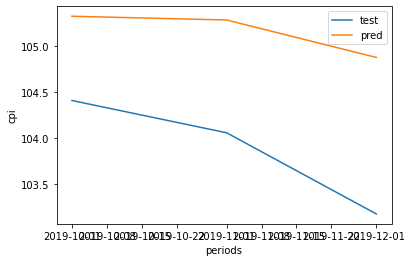

h	rmse	nrmse
1	0.9138	0.8752
3	1.3180	1.2688
6	1.3180	1.2688
12	1.3180	1.2688
reg_name:  LIP
CPU times: user 54 µs, sys: 39 µs, total: 93 µs
Wall time: 96.6 µs


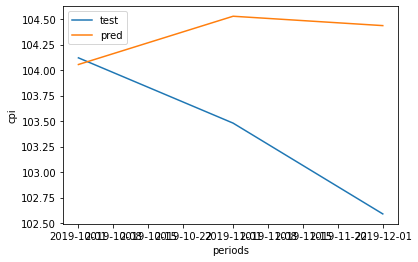

h	rmse	nrmse
1	0.0654	0.0628
3	1.2260	1.1858
6	1.2260	1.1858
12	1.2260	1.1858
reg_name:  MOS
CPU times: user 217 µs, sys: 153 µs, total: 370 µs
Wall time: 267 µs


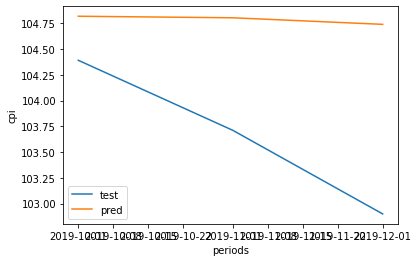

h	rmse	nrmse
1	0.4272	0.4093
3	1.2591	1.2146
6	1.2591	1.2146
12	1.2591	1.2146
reg_name:  ORL
CPU times: user 53 µs, sys: 39 µs, total: 92 µs
Wall time: 94.7 µs


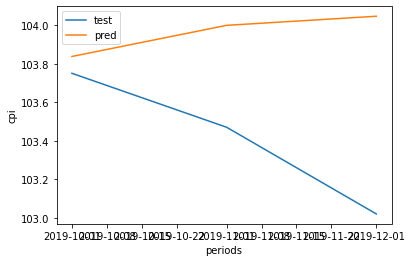

h	rmse	nrmse
1	0.0873	0.0842
3	0.6685	0.6464
6	0.6685	0.6464
12	0.6685	0.6464
reg_name:  RYA
CPU times: user 413 µs, sys: 0 ns, total: 413 µs
Wall time: 326 µs


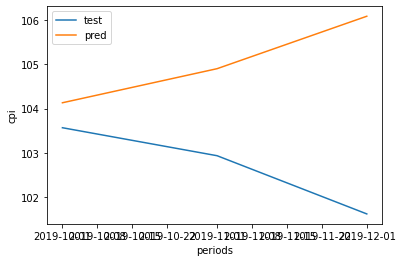

h	rmse	nrmse
1	0.5620	0.5426
3	2.8255	2.7509
6	2.8255	2.7509
12	2.8255	2.7509
reg_name:  SMO
CPU times: user 52 µs, sys: 37 µs, total: 89 µs
Wall time: 93.5 µs


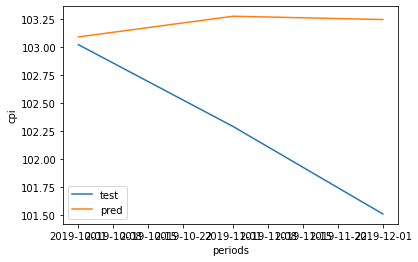

h	rmse	nrmse
1	0.0691	0.0671
3	1.1518	1.1262
6	1.1518	1.1262
12	1.1518	1.1262
reg_name:  TAM
CPU times: user 187 µs, sys: 131 µs, total: 318 µs
Wall time: 248 µs


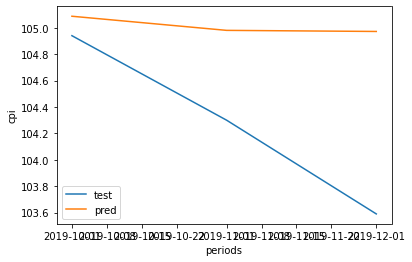

h	rmse	nrmse
1	0.1473	0.1404
3	0.8934	0.8568
6	0.8934	0.8568
12	0.8934	0.8568
reg_name:  TVE
CPU times: user 78 µs, sys: 54 µs, total: 132 µs
Wall time: 139 µs


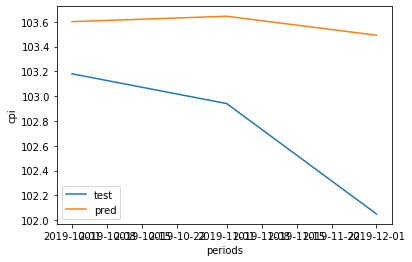

h	rmse	nrmse
1	0.4205	0.4076
3	0.9574	0.9320
6	0.9574	0.9320
12	0.9574	0.9320
reg_name:  TUL
CPU times: user 52 µs, sys: 37 µs, total: 89 µs
Wall time: 92.7 µs


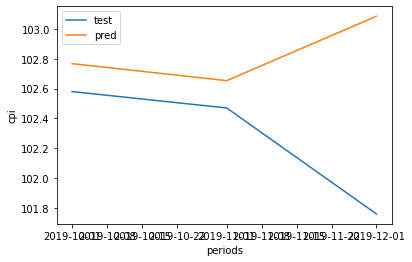

h	rmse	nrmse
1	0.1871	0.1824
3	0.7797	0.7624
6	0.7797	0.7624
12	0.7797	0.7624
reg_name:  YAR
CPU times: user 56 µs, sys: 40 µs, total: 96 µs
Wall time: 99.4 µs


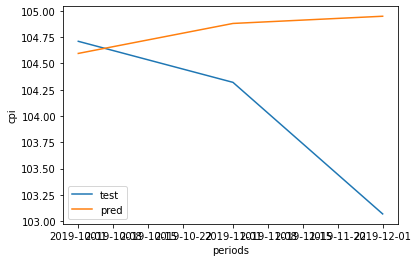

h	rmse	nrmse
1	0.1152	0.1100
3	1.1334	1.0895
6	1.1334	1.0895
12	1.1334	1.0895
reg_name:  MOW
CPU times: user 55 µs, sys: 37 µs, total: 92 µs
Wall time: 94.9 µs


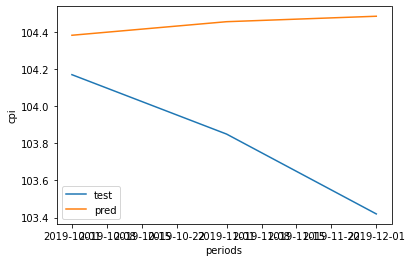

h	rmse	nrmse
1	0.2123	0.2038
3	0.7177	0.6913
6	0.7177	0.6913
12	0.7177	0.6913
reg_name:  KAR
CPU times: user 111 µs, sys: 0 ns, total: 111 µs
Wall time: 114 µs


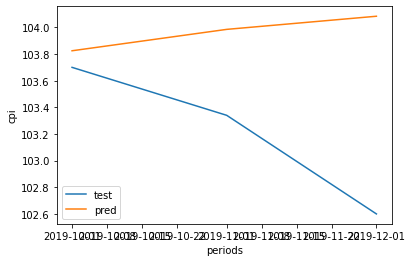

h	rmse	nrmse
1	0.1245	0.1201
3	0.9368	0.9076
6	0.9368	0.9076
12	0.9368	0.9076
reg_name:  KOM
CPU times: user 56 µs, sys: 39 µs, total: 95 µs
Wall time: 98.7 µs


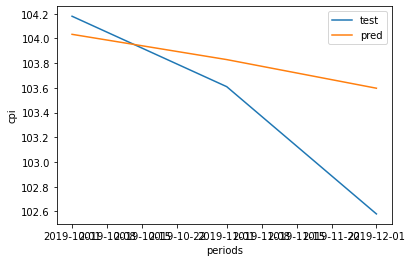

h	rmse	nrmse
1	0.1463	0.1405
3	0.6068	0.5865
6	0.6068	0.5865
12	0.6068	0.5865
reg_name:  ARK
CPU times: user 277 µs, sys: 195 µs, total: 472 µs
Wall time: 346 µs


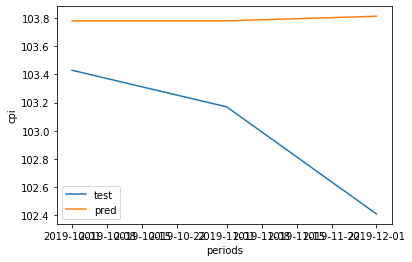

h	rmse	nrmse
1	0.3505	0.3389
3	0.9065	0.8800
6	0.9065	0.8800
12	0.9065	0.8800
reg_name:  VLG
CPU times: user 66 µs, sys: 47 µs, total: 113 µs
Wall time: 118 µs


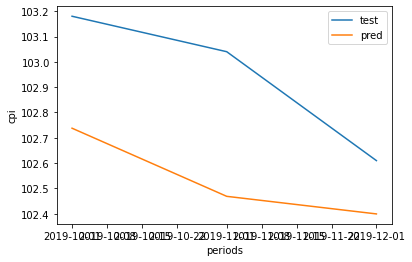

h	rmse	nrmse
1	0.4421	0.4285
3	0.4343	0.4219
6	0.4343	0.4219
12	0.4343	0.4219
reg_name:  KAG
CPU times: user 131 µs, sys: 0 ns, total: 131 µs
Wall time: 137 µs


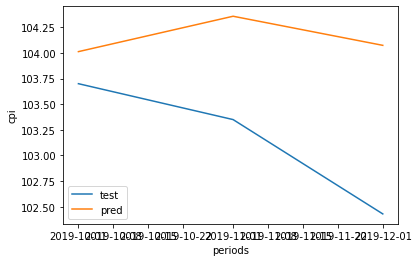

h	rmse	nrmse
1	0.3126	0.3015
3	1.1278	1.0933
6	1.1278	1.0933
12	1.1278	1.0933
reg_name:  LEN
CPU times: user 70 µs, sys: 49 µs, total: 119 µs
Wall time: 124 µs


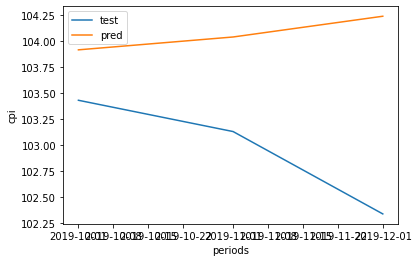

h	rmse	nrmse
1	0.4837	0.4677
3	1.2452	1.2093
6	1.2452	1.2093
12	1.2452	1.2093
reg_name:  MUR
CPU times: user 199 µs, sys: 140 µs, total: 339 µs
Wall time: 268 µs


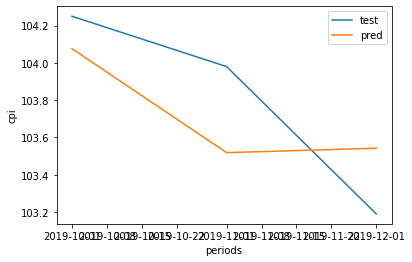

h	rmse	nrmse
1	0.1739	0.1668
3	0.3498	0.3370
6	0.3498	0.3370
12	0.3498	0.3370
reg_name:  NGR
CPU times: user 55 µs, sys: 38 µs, total: 93 µs
Wall time: 96.3 µs


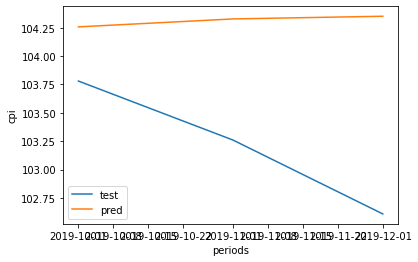

h	rmse	nrmse
1	0.4771	0.4597
3	1.2104	1.1727
6	1.2104	1.1727
12	1.2104	1.1727
reg_name:  PSK
CPU times: user 152 µs, sys: 0 ns, total: 152 µs
Wall time: 158 µs


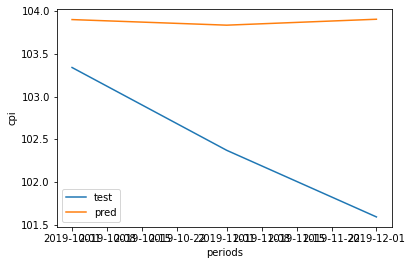

h	rmse	nrmse
1	0.5612	0.5431
3	1.6149	1.5765
6	1.6149	1.5765
12	1.6149	1.5765
reg_name:  SPB
CPU times: user 53 µs, sys: 38 µs, total: 91 µs
Wall time: 94.4 µs


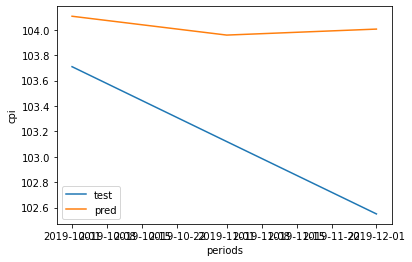

h	rmse	nrmse
1	0.3974	0.3832
3	0.9971	0.9668
6	0.9971	0.9668
12	0.9971	0.9668
reg_name:  ADY
CPU times: user 118 µs, sys: 0 ns, total: 118 µs
Wall time: 123 µs


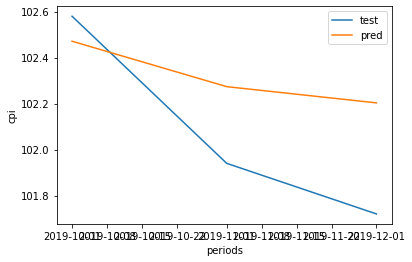

h	rmse	nrmse
1	0.1086	0.1059
3	0.3447	0.3377
6	0.3447	0.3377
12	0.3447	0.3377
reg_name:  KLM
CPU times: user 56 µs, sys: 39 µs, total: 95 µs
Wall time: 98 µs


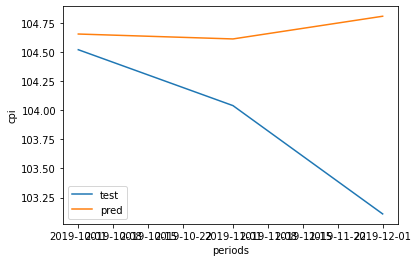

h	rmse	nrmse
1	0.1347	0.1289
3	1.0371	0.9983
6	1.0371	0.9983
12	1.0371	0.9983
reg_name:  KRA
CPU times: user 61 µs, sys: 42 µs, total: 103 µs
Wall time: 108 µs


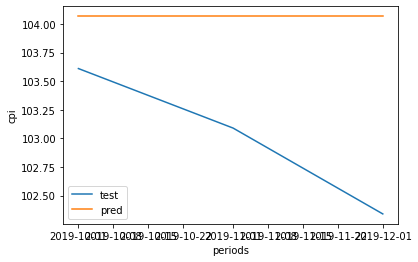

h	rmse	nrmse
1	0.4570	0.4411
3	1.1756	1.1412
6	1.1756	1.1412
12	1.1756	1.1412
reg_name:  AST
CPU times: user 319 µs, sys: 224 µs, total: 543 µs
Wall time: 387 µs


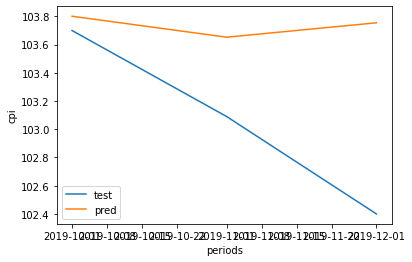

h	rmse	nrmse
1	0.1013	0.0976
3	0.8490	0.8238
6	0.8490	0.8238
12	0.8490	0.8238
reg_name:  VGG
CPU times: user 272 µs, sys: 191 µs, total: 463 µs
Wall time: 357 µs


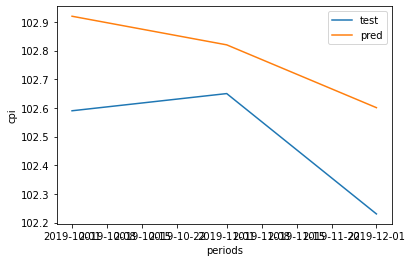

h	rmse	nrmse
1	0.3299	0.3216
3	0.3029	0.2956
6	0.3029	0.2956
12	0.3029	0.2956
reg_name:  ROS
CPU times: user 107 µs, sys: 0 ns, total: 107 µs
Wall time: 111 µs


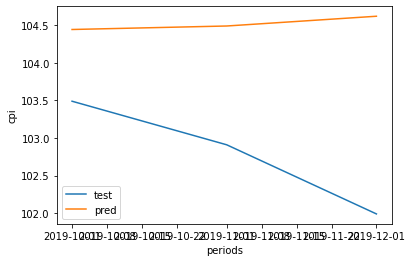

h	rmse	nrmse
1	0.9547	0.9225
3	1.8560	1.8055
6	1.8560	1.8055
12	1.8560	1.8055
reg_name:  DAG
CPU times: user 407 µs, sys: 0 ns, total: 407 µs
Wall time: 322 µs


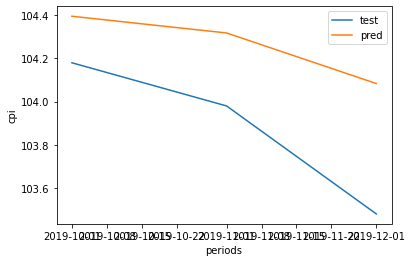

h	rmse	nrmse
1	0.2155	0.2069
3	0.4185	0.4029
6	0.4185	0.4029
12	0.4185	0.4029
reg_name:  ING
CPU times: user 65 µs, sys: 45 µs, total: 110 µs
Wall time: 114 µs


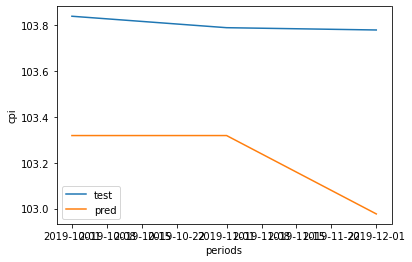

h	rmse	nrmse
1	0.5211	0.5019
3	0.6162	0.5936
6	0.6162	0.5936
12	0.6162	0.5936
reg_name:  KAB
CPU times: user 57 µs, sys: 40 µs, total: 97 µs
Wall time: 99.7 µs


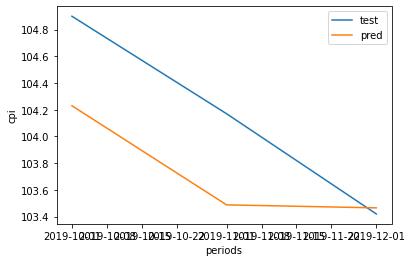

h	rmse	nrmse
1	0.6702	0.6389
3	0.5528	0.5307
6	0.5528	0.5307
12	0.5528	0.5307
reg_name:  KAO
CPU times: user 68 µs, sys: 47 µs, total: 115 µs
Wall time: 120 µs


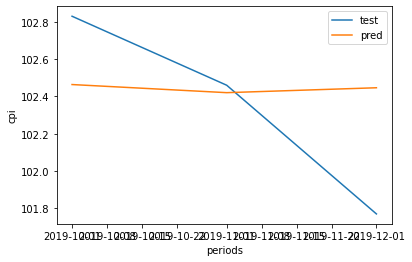

h	rmse	nrmse
1	0.3663	0.3562
3	0.4447	0.4345
6	0.4447	0.4345
12	0.4447	0.4345
reg_name:  NOR
CPU times: user 146 µs, sys: 0 ns, total: 146 µs
Wall time: 152 µs


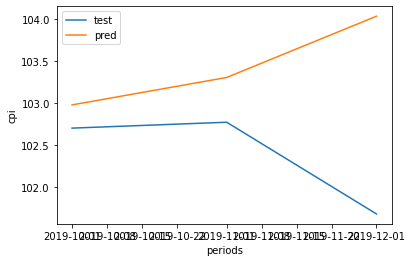

h	rmse	nrmse
1	0.2762	0.2690
3	1.4003	1.3677
6	1.4003	1.3677
12	1.4003	1.3677
reg_name:  STA
CPU times: user 74 µs, sys: 51 µs, total: 125 µs
Wall time: 131 µs


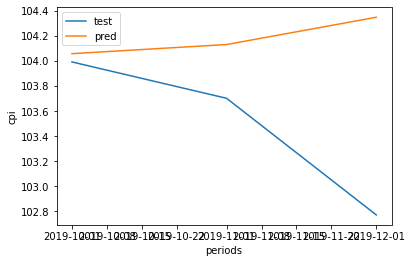

h	rmse	nrmse
1	0.0658	0.0633
3	0.9440	0.9122
6	0.9440	0.9122
12	0.9440	0.9122
reg_name:  BAS
CPU times: user 56 µs, sys: 40 µs, total: 96 µs
Wall time: 98.9 µs


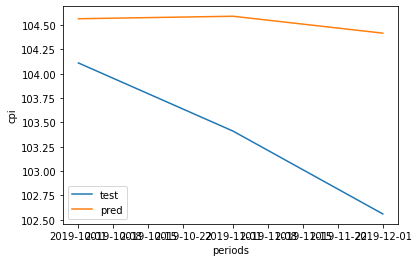

h	rmse	nrmse
1	0.4541	0.4361
3	1.2965	1.2544
6	1.2965	1.2544
12	1.2965	1.2544
reg_name:  MAR
CPU times: user 132 µs, sys: 0 ns, total: 132 µs
Wall time: 147 µs


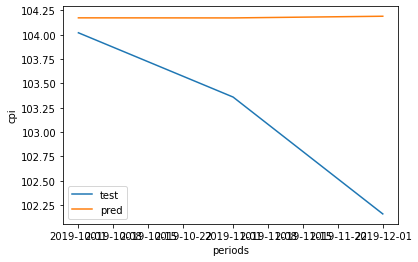

h	rmse	nrmse
1	0.1534	0.1475
3	1.2654	1.2264
6	1.2654	1.2264
12	1.2654	1.2264
reg_name:  MOR
CPU times: user 69 µs, sys: 49 µs, total: 118 µs
Wall time: 123 µs


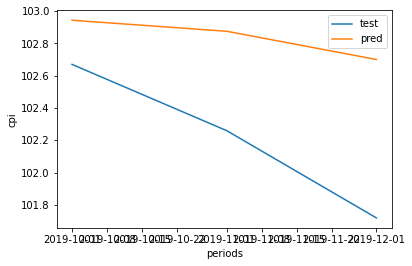

h	rmse	nrmse
1	0.2733	0.2662
3	0.6865	0.6716
6	0.6865	0.6716
12	0.6865	0.6716
reg_name:  TAT
CPU times: user 54 µs, sys: 37 µs, total: 91 µs
Wall time: 94.2 µs


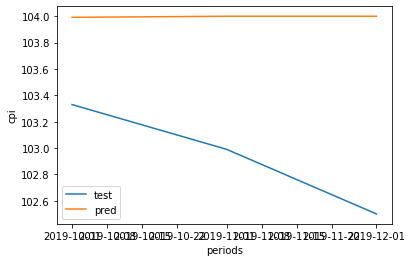

h	rmse	nrmse
1	0.6622	0.6408
3	1.1122	1.0804
6	1.1122	1.0804
12	1.1122	1.0804
reg_name:  UDM
CPU times: user 54 µs, sys: 38 µs, total: 92 µs
Wall time: 95.4 µs


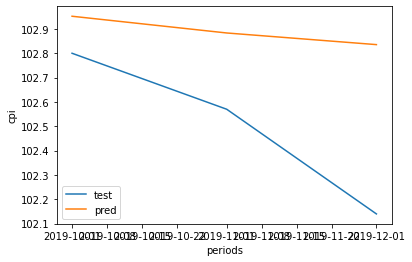

h	rmse	nrmse
1	0.1521	0.1479
3	0.4491	0.4381
6	0.4491	0.4381
12	0.4491	0.4381
reg_name:  CHV
CPU times: user 84 µs, sys: 59 µs, total: 143 µs
Wall time: 164 µs


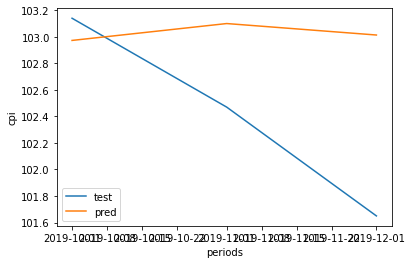

h	rmse	nrmse
1	0.1672	0.1621
3	0.8726	0.8520
6	0.8726	0.8520
12	0.8726	0.8520
reg_name:  PER
CPU times: user 55 µs, sys: 39 µs, total: 94 µs
Wall time: 97.5 µs


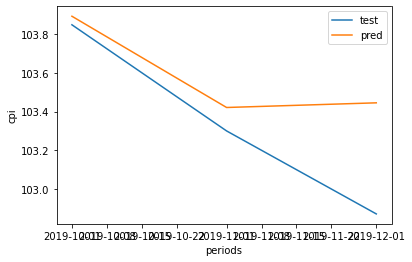

h	rmse	nrmse
1	0.0443	0.0427
3	0.3406	0.3296
6	0.3406	0.3296
12	0.3406	0.3296
reg_name:  KIR
CPU times: user 754 µs, sys: 0 ns, total: 754 µs
Wall time: 551 µs


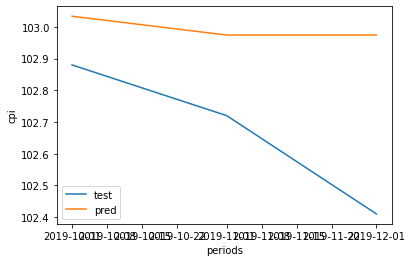

h	rmse	nrmse
1	0.1536	0.1493
3	0.3681	0.3586
6	0.3681	0.3586
12	0.3681	0.3586
reg_name:  NIZ
CPU times: user 58 µs, sys: 40 µs, total: 98 µs
Wall time: 112 µs


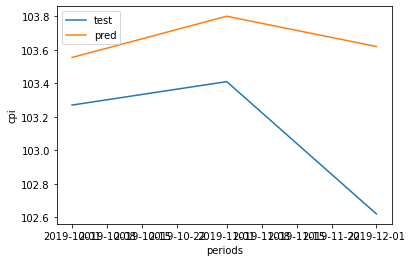

h	rmse	nrmse
1	0.2842	0.2752
3	0.6410	0.6218
6	0.6410	0.6218
12	0.6410	0.6218
reg_name:  ORE
CPU times: user 106 µs, sys: 0 ns, total: 106 µs
Wall time: 110 µs


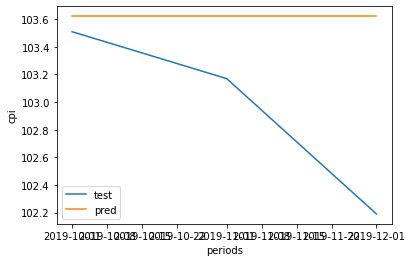

h	rmse	nrmse
1	0.1119	0.1081
3	0.8693	0.8443
6	0.8693	0.8443
12	0.8693	0.8443
reg_name:  PNZ
CPU times: user 587 µs, sys: 0 ns, total: 587 µs
Wall time: 433 µs


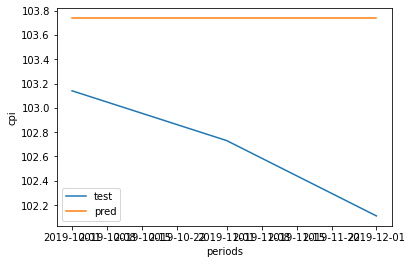

h	rmse	nrmse
1	0.5973	0.5791
3	1.1575	1.1275
6	1.1575	1.1275
12	1.1575	1.1275
reg_name:  SAM
CPU times: user 142 µs, sys: 100 µs, total: 242 µs
Wall time: 183 µs


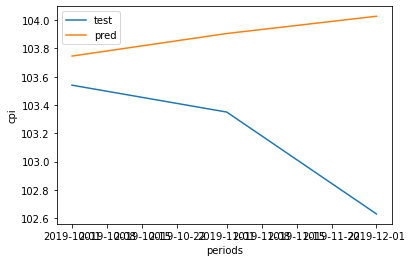

h	rmse	nrmse
1	0.2059	0.1988
3	0.8762	0.8492
6	0.8762	0.8492
12	0.8762	0.8492
reg_name:  SAR
CPU times: user 178 µs, sys: 125 µs, total: 303 µs
Wall time: 235 µs


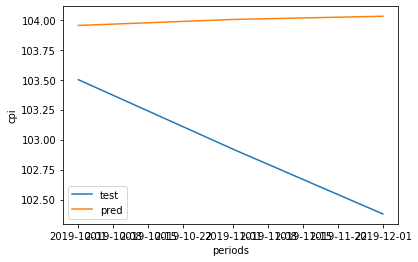

h	rmse	nrmse
1	0.4526	0.4373
3	1.1687	1.1354
6	1.1687	1.1354
12	1.1687	1.1354
reg_name:  ULY
CPU times: user 313 µs, sys: 0 ns, total: 313 µs
Wall time: 248 µs


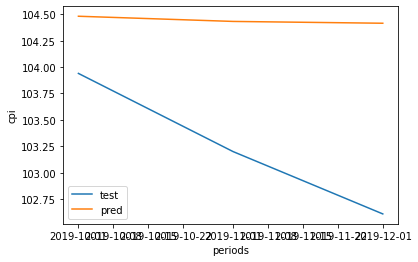

h	rmse	nrmse
1	0.5412	0.5207
3	1.2999	1.2590
6	1.2999	1.2590
12	1.2999	1.2590
reg_name:  KUG
CPU times: user 105 µs, sys: 0 ns, total: 105 µs
Wall time: 109 µs


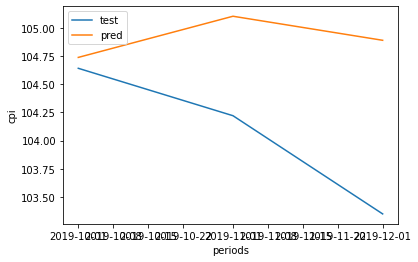

h	rmse	nrmse
1	0.0965	0.0922
3	1.0249	0.9849
6	1.0249	0.9849
12	1.0249	0.9849
reg_name:  SVE
CPU times: user 55 µs, sys: 38 µs, total: 93 µs
Wall time: 96.3 µs


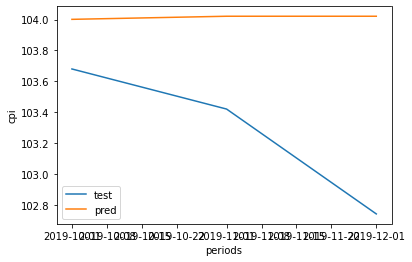

h	rmse	nrmse
1	0.3218	0.3104
3	0.8385	0.8119
6	0.8385	0.8119
12	0.8385	0.8119
reg_name:  TYU
CPU times: user 53 µs, sys: 37 µs, total: 90 µs
Wall time: 93.7 µs


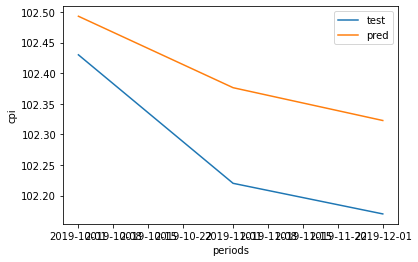

h	rmse	nrmse
1	0.0630	0.0615
3	0.1313	0.1284
6	0.1313	0.1284
12	0.1313	0.1284
reg_name:  CHE
CPU times: user 56 µs, sys: 41 µs, total: 97 µs
Wall time: 101 µs


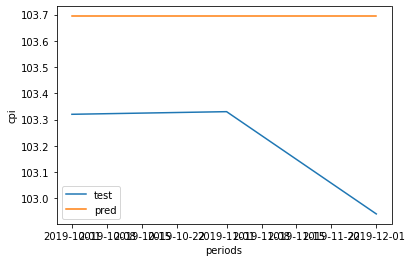

h	rmse	nrmse
1	0.3740	0.3619
3	0.5294	0.5130
6	0.5294	0.5130
12	0.5294	0.5130
reg_name:  ALI
CPU times: user 54 µs, sys: 38 µs, total: 92 µs
Wall time: 95.6 µs


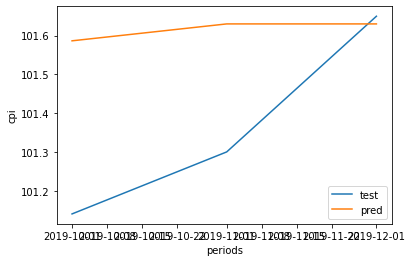

h	rmse	nrmse
1	0.4466	0.4416
3	0.3209	0.3166
6	0.3209	0.3166
12	0.3209	0.3166
reg_name:  TUV
CPU times: user 55 µs, sys: 38 µs, total: 93 µs
Wall time: 98 µs


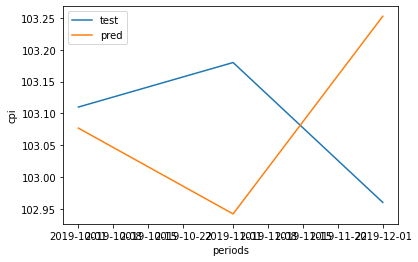

h	rmse	nrmse
1	0.0331	0.0321
3	0.2187	0.2122
6	0.2187	0.2122
12	0.2187	0.2122
reg_name:  KHK
CPU times: user 58 µs, sys: 40 µs, total: 98 µs
Wall time: 102 µs


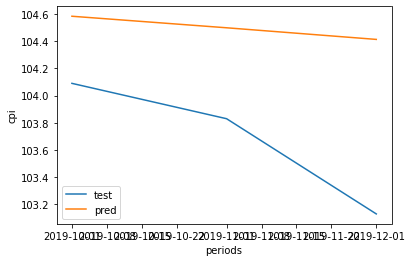

h	rmse	nrmse
1	0.4935	0.4741
3	0.8826	0.8513
6	0.8826	0.8513
12	0.8826	0.8513
reg_name:  ALT
CPU times: user 564 µs, sys: 0 ns, total: 564 µs
Wall time: 436 µs


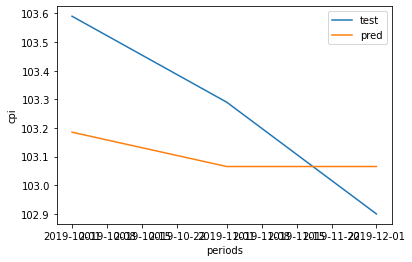

h	rmse	nrmse
1	0.4048	0.3907
3	0.2838	0.2748
6	0.2838	0.2748
12	0.2838	0.2748
reg_name:  KYA
CPU times: user 111 µs, sys: 0 ns, total: 111 µs
Wall time: 117 µs


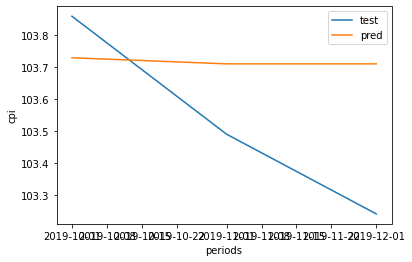

h	rmse	nrmse
1	0.1302	0.1254
3	0.3094	0.2989
6	0.3094	0.2989
12	0.3094	0.2989
reg_name:  IRK
CPU times: user 92 µs, sys: 0 ns, total: 92 µs
Wall time: 95.4 µs


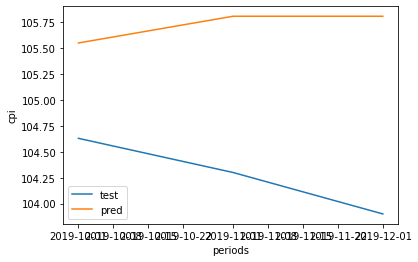

h	rmse	nrmse
1	0.9210	0.8802
3	1.5023	1.4407
6	1.5023	1.4407
12	1.5023	1.4407
reg_name:  KEM
CPU times: user 207 µs, sys: 146 µs, total: 353 µs
Wall time: 280 µs


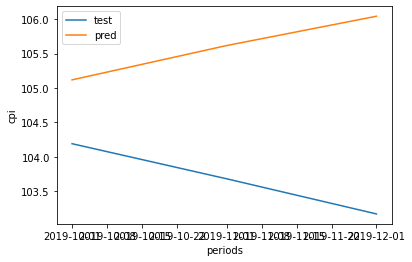

h	rmse	nrmse
1	0.9273	0.8900
3	2.0699	1.9964
6	2.0699	1.9964
12	2.0699	1.9964
reg_name:  NVS
CPU times: user 768 µs, sys: 0 ns, total: 768 µs
Wall time: 558 µs


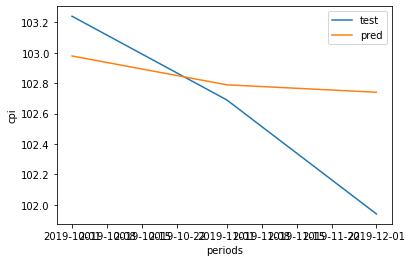

h	rmse	nrmse
1	0.2612	0.2530
3	0.4893	0.4768
6	0.4893	0.4768
12	0.4893	0.4768
reg_name:  OMS
CPU times: user 130 µs, sys: 0 ns, total: 130 µs
Wall time: 136 µs


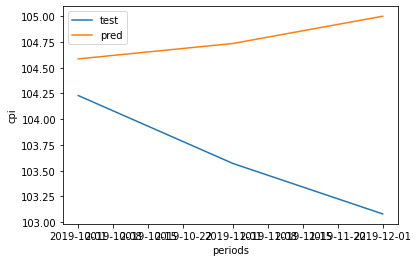

h	rmse	nrmse
1	0.3564	0.3419
3	1.3135	1.2675
6	1.3135	1.2675
12	1.3135	1.2675
reg_name:  TOM
CPU times: user 57 µs, sys: 41 µs, total: 98 µs
Wall time: 101 µs


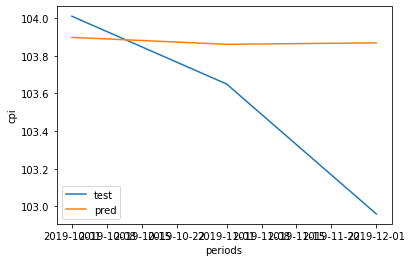

h	rmse	nrmse
1	0.1122	0.1079
3	0.5424	0.5238
6	0.5424	0.5238
12	0.5424	0.5238
reg_name:  BUR
CPU times: user 54 µs, sys: 37 µs, total: 91 µs
Wall time: 93.9 µs


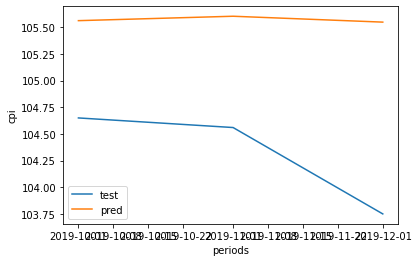

h	rmse	nrmse
1	0.9122	0.8717
3	1.3109	1.2566
6	1.3109	1.2566
12	1.3109	1.2566
reg_name:  ZAB
CPU times: user 956 µs, sys: 50 µs, total: 1.01 ms
Wall time: 739 µs


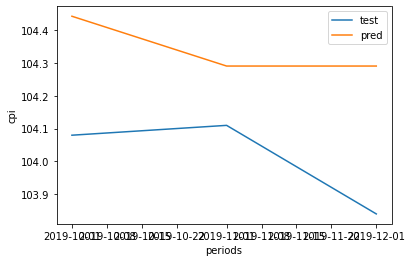

h	rmse	nrmse
1	0.3627	0.3485
3	0.3500	0.3365
6	0.3500	0.3365
12	0.3500	0.3365
reg_name:  SAH
CPU times: user 58 µs, sys: 41 µs, total: 99 µs
Wall time: 101 µs


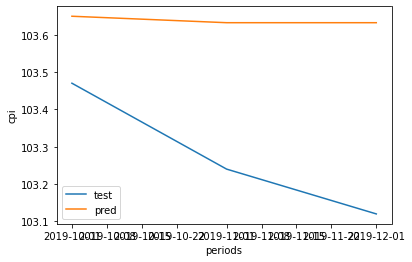

h	rmse	nrmse
1	0.1793	0.1733
3	0.3865	0.3742
6	0.3865	0.3742
12	0.3865	0.3742
reg_name:  KAM
CPU times: user 120 µs, sys: 0 ns, total: 120 µs
Wall time: 126 µs


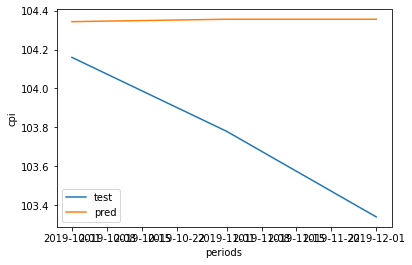

h	rmse	nrmse
1	0.1835	0.1761
3	0.6825	0.6577
6	0.6825	0.6577
12	0.6825	0.6577
reg_name:  PRI
CPU times: user 57 µs, sys: 40 µs, total: 97 µs
Wall time: 99.9 µs


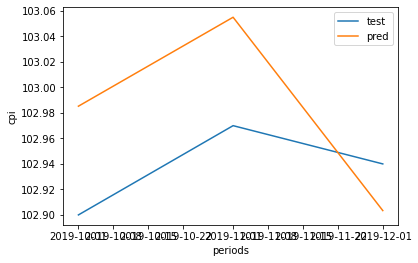

h	rmse	nrmse
1	0.0853	0.0829
3	0.0727	0.0706
6	0.0727	0.0706
12	0.0727	0.0706
reg_name:  KHA
CPU times: user 74 µs, sys: 53 µs, total: 127 µs
Wall time: 132 µs


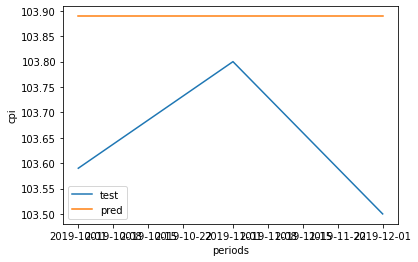

h	rmse	nrmse
1	0.2994	0.2891
3	0.2883	0.2782
6	0.2883	0.2782
12	0.2883	0.2782
reg_name:  AMU
CPU times: user 118 µs, sys: 0 ns, total: 118 µs
Wall time: 124 µs


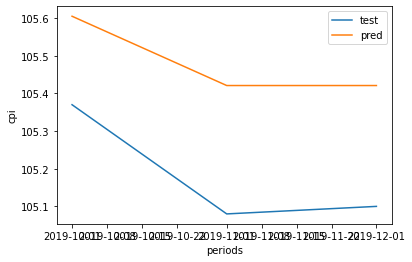

h	rmse	nrmse
1	0.2349	0.2230
3	0.3025	0.2875
6	0.3025	0.2875
12	0.3025	0.2875
reg_name:  MAG
CPU times: user 142 µs, sys: 0 ns, total: 142 µs
Wall time: 148 µs


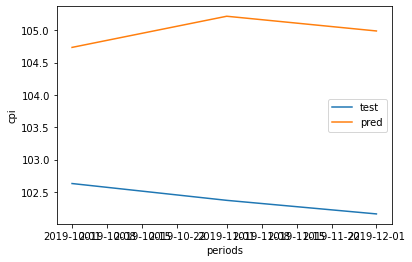

h	rmse	nrmse
1	2.1058	2.0518
3	2.6174	2.5564
6	2.6174	2.5564
12	2.6174	2.5564
reg_name:  SAK
CPU times: user 444 µs, sys: 0 ns, total: 444 µs
Wall time: 345 µs


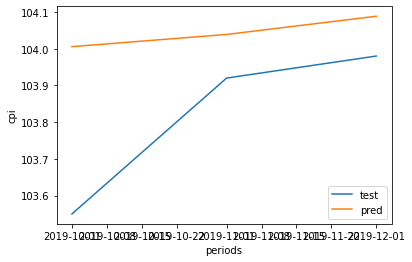

h	rmse	nrmse
1	0.4556	0.4400
3	0.2790	0.2687
6	0.2790	0.2687
12	0.2790	0.2687
reg_name:  JEW
CPU times: user 701 µs, sys: 0 ns, total: 701 µs
Wall time: 537 µs


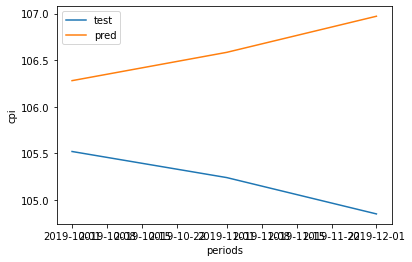

h	rmse	nrmse
1	0.7604	0.7206
3	1.5151	1.4402
6	1.5151	1.4402
12	1.5151	1.4402
reg_name:  CHU
CPU times: user 66 µs, sys: 46 µs, total: 112 µs
Wall time: 117 µs


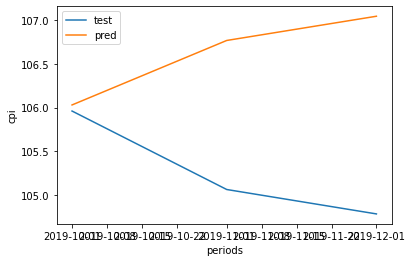

h	rmse	nrmse
1	0.0699	0.0659
3	1.6399	1.5578
6	1.6399	1.5578
12	1.6399	1.5578


In [89]:
rmse_list = []
nrmse_list = []

# reg_name = 'SBFO'
for reg_name in reg_names:
  print('=======================================================================')
  print('reg_name: ', reg_name)

  # make lag factors for reg_name
  df = pd.DataFrame()
  df['t'] = data[reg_name].values
  for i in range(1, 13):
      df['t-'+str(i)] = data[reg_name].shift(i).values
      
  df.index = data.index
  df = df.tail(-12)

  # add month number
  df['month'] = pd.DatetimeIndex(df.index).month

  train = df[:-test_len]
  test = df[-test_len:].t

  X_train = train[['month'] + ['t-{}'.format(month) for month in range(1,13)]].values
  y_train = train[['t']].values.ravel()

  #train model
  %time model = XGBRegressor(n_estimators=100, \
                            random_state=42, \
                            objective ='reg:squarederror')
  model.fit(X_train, y_train)

  # sliding window forecast
  slide_test = df[-test_len:-test_len+1][['month'] + ['t-{}'.format(month) for month in range(1,13)]].values

  predict = []
  predict.append(model.predict(slide_test)[0])

  for _ in range(1,test_len):
    
    slide_test_next = slide_test.copy()
    slide_test_next[0, 1] = predict[-1]

    slide_test_next[0, 0] = (slide_test_next[0, 0])%12 + 1 
    slide_test_next[0, 2:] = slide_test[0, 1:-1]
    
    # print(slide_test_next)
    slide_test = slide_test_next.copy()

    predict.append(model.predict(slide_test)[0])

  predict = pd.DataFrame(np.array(predict), index = test.index, columns=[reg_name])
  plot_series(test, predict[reg_name])

  # print results
  rmse_reg, nrmse_reg = get_metric(test.values, predict[reg_name].values, horizon=[1,3,6,12])

  rmse_list.append(rmse_reg)
  nrmse_list.append(nrmse_reg)

## region average

In [90]:
print('metric\horizon\th=1\th=3\th=6\th=12')
mean_rmse_list = np.mean(rmse_list, axis=0)
print('rmse\t\t{:.4f}\t{:.4f}\t{:.4f}\t{:.4f}'.format(mean_rmse_list[0], mean_rmse_list[1], mean_rmse_list[2], mean_rmse_list[3]))
mean_nrmse_list = np.mean(nrmse_list, axis=0)
print('nrmse\t\t{:.4f}\t{:.4f}\t{:.4f}\t{:.4f}'.format(mean_nrmse_list[0], mean_nrmse_list[1], mean_nrmse_list[2], mean_nrmse_list[3]))

metric\horizon	h=1	h=3	h=6	h=12
rmse		0.3574	0.9107	0.9107	0.9107
nrmse		0.3447	0.8819	0.8819	0.8819


# Extreme Gradient Boosting with features (not realised yet)
  separate reg models

In [ ]:
from xgboost import XGBRegressor

## Training once, forecast for test_len period

In [ ]:
"""
from google.colab import files
files.upload()
"""

In [ ]:
def add_means(data, horizon=[2,3,4,5,6,12]):
  for h in horizon:
    data['mean_{}'.format] = np.mean(data['t-{}'.format(i) for in range(h)].values)


In [ ]:
rmse_list = []
nrmse_list = []

# reg_name = 'SBFO'
for reg_name in reg_names:
  print('=======================================================================')
  print('reg_name: ', reg_name)

  # make lag factors for reg_name
  df = pd.DataFrame()
  df['t'] = data[reg_name].values
  for i in range(1, 13):
      df['t-'+str(i)] = data[reg_name].shift(i).values
      
  df.index = data.index
  df = df.tail(-12)

  # add month number
  df['month'] = pd.DatetimeIndex(df.index).month

  train = df[:-test_len]
  test = df[-test_len:].t

  X_train = train[['month'] + ['t-{}'.format(month) for month in range(1,13)]].values
  y_train = train[['t']].values.ravel()

  #train model
  %time model = XGBRegressor(n_estimators=100, \
                            random_state=42, \
                            objective ='reg:squarederror')
  model.fit(X_train, y_train)

  # sliding window forecast
  slide_test = df[-test_len:-test_len+1][['month'] + ['t-{}'.format(month) for month in range(1,13)]].values

  predict = []
  predict.append(model.predict(slide_test)[0])

  for _ in range(1,test_len):
    
    slide_test_next = slide_test.copy()
    slide_test_next[0, 1] = predict[-1]

    slide_test_next[0, 0] = (slide_test_next[0, 0])%12 + 1 
    slide_test_next[0, 2:] = slide_test[0, 1:-1]
    
    # print(slide_test_next)
    slide_test = slide_test_next.copy()

    predict.append(model.predict(slide_test)[0])

  predict = pd.DataFrame(np.array(predict), index = test.index, columns=[reg_name])
  plot_series(test, predict[reg_name])

  # print results
  rmse_reg, nrmse_reg = get_metric(test.values, predict[reg_name].values, horizon=[1,3,6,12])

  rmse_list.append(rmse_reg)
  nrmse_list.append(nrmse_reg)

## region average

In [ ]:
print('metric\horizon\th=1\th=3\th=6\th=12')
mean_rmse_list = np.mean(rmse_list, axis=0)
print('rmse\t\t{:.4f}\t{:.4f}\t{:.4f}\t{:.4f}'.format(mean_rmse_list[0], mean_rmse_list[1], mean_rmse_list[2], mean_rmse_list[3]))
mean_nrmse_list = np.mean(nrmse_list, axis=0)
print('nrmse\t\t{:.4f}\t{:.4f}\t{:.4f}\t{:.4f}'.format(mean_nrmse_list[0], mean_nrmse_list[1], mean_nrmse_list[2], mean_nrmse_list[3]))